In [1]:
import pandas as pd
import numpy as np

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
sns.set(color_codes=True, font_scale=1.25)

In [3]:
import copy

In [4]:
# import data
reviews_airline = pd.read_csv('/Users/monikakrajnc/Desktop/Python_&_R_projects/Springboard/Capstone_project_2/Data/Processed/skytrax-reviews-dataset-master/data/airline.csv')

In [5]:
# check first few rows
reviews_airline.head(6)

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min f...,NaN,NaN,Economy,NaN,7.0,4.0,4.0,4.0,0.0,NaN,NaN,4.0,1
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast ...,NaN,NaN,Business Class,NaN,10.0,4.0,5.0,4.0,1.0,NaN,NaN,5.0,1
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. ...,NaN,NaN,Economy,NaN,9.0,5.0,5.0,4.0,0.0,NaN,NaN,5.0,1
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljan...,NaN,NaN,Business Class,NaN,8.0,4.0,4.0,3.0,1.0,NaN,NaN,4.0,1
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,WAW-SKJ Economy. No free snacks or drinks on t...,NaN,NaN,Economy,NaN,4.0,4.0,2.0,1.0,2.0,NaN,NaN,2.0,0
5,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Dzano Edin,Germany,2014-06-08,Sarajevo-Frankfurt via Ljubljana. I loved flyi...,NaN,NaN,Economy,NaN,9.0,4.0,4.0,3.0,3.0,NaN,NaN,4.0,1


In [122]:
# check if there are any repeated routes, routes that appear more than once
reviews_airline.groupby('route').size()

route
 Metro Airport from Boston Logan          1
ABZ to LHR                                1
AEP-GRU and GRU-AEP                       1
AGP to BRU                                1
AKL to HKG                                1
                                         ..
chicago to Las vegas via phoenix          1
ft wayne indiana to Clearwater florida    1
ord to san                                1
rome to athens                            1
İstanbul to Adana                         1
Length: 2208, dtype: int64

In [6]:
# get more information on the dataframe
reviews_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41396 entries, 0 to 41395
Data columns (total 20 columns):
airline_name                     41396 non-null object
link                             41396 non-null object
title                            41396 non-null object
author                           41396 non-null object
author_country                   39805 non-null object
date                             41396 non-null object
content                          41396 non-null object
aircraft                         1278 non-null object
type_traveller                   2378 non-null object
cabin_flown                      38520 non-null object
route                            2341 non-null object
overall_rating                   36861 non-null float64
seat_comfort_rating              33706 non-null float64
cabin_staff_rating               33708 non-null float64
food_beverages_rating            33264 non-null float64
inflight_entertainment_rating    31114 non-null float64
ground_se

In [7]:
# get summary statistics
reviews_airline.describe()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
count,36861.000000,33706.000000,33708.000000,33264.000000,31114.000000,2203.000000,565.000000,39723.000000,41396.000000
mean,6.039527,3.094612,3.319212,2.805886,2.392364,2.736723,2.249558,3.164111,0.533820
std,3.214680,1.405515,1.541307,1.580246,1.704753,1.569073,1.541283,1.523486,0.498861
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
50%,7.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.000000,4.000000,1.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [8]:
# make a copy of the original data
reviews_airline_copy = reviews_airline.copy()

In [9]:
# number of different airlines
reviews_airline.airline_name.nunique()

362

In [10]:
# getting all different airlines
airlines_unique = reviews_airline.airline_name.unique()
airlines_unique

array(['adria-airways', 'aegean-airlines', 'aer-lingus', 'aerocaribbean',
       'aeroflot-russian-airlines', 'aerolineas-argentinas', 'aeromexico',
       'aerosur', 'afriqiyah-airways', 'aigle-azur', 'air-algerie',
       'air-arabia', 'air-astana', 'air-austral', 'air-bagan',
       'air-berlin', 'air-botswana', 'air-busan', 'air-cairo-user',
       'air-canada', 'air-canada-rouge', 'air-caraibes', 'air-china',
       'air-corsica', 'air-dolomiti', 'air-europa', 'air-france',
       'air-greenland', 'air-india', 'air-india-express', 'air-koryo',
       'air-labrador', 'air-macau', 'air-madagascar', 'air-malawi',
       'air-malta', 'air-mauritius', 'air-mediterranee', 'air-memphis',
       'air-moldova', 'air-namibia', 'air-new-zealand', 'air-niugini',
       'air-north-yukons-airline', 'air-nostrum', 'air-serbia',
       'air-seychelles', 'air-tahiti-nui', 'air-transat', 'air-vanuata',
       'air-zimbabwe', 'airasia', 'airasia-x', 'airasia-zest',
       'airbaltic', 'air-blue', 'a

In [11]:
# return the frequency of each unique value in 'airline_name' column
entries_per_airline = reviews_airline.groupby('airline_name').size().sort_values(ascending=False)

In [12]:
entries_per_airline

airline_name
spirit-airlines      990
british-airways      901
united-airlines      840
jet-airways          727
air-canada-rouge     715
                    ... 
henan-airlines         1
hop                    1
tropic-air-belize      1
la-compagnie           1
europe-airpost         1
Length: 362, dtype: int64

In [13]:
# check number of reviews for the first 113 airlines
entries_per_airline.head(113)

airline_name
spirit-airlines       990
british-airways       901
united-airlines       840
jet-airways           727
air-canada-rouge      715
                     ... 
air-mauritius         108
airbaltic             106
cebu-pacific          103
csa-czech-airlines    100
canjet-airlines        99
Length: 113, dtype: int64

In [14]:
# create a list with most reviewed airlines
airlines_112_most_entries = list(entries_per_airline.head(112).index)

In [15]:
# create a dataframe with the first 112 airlines by number of reviews
data_112_most_entries = reviews_airline_copy.loc[reviews_airline_copy['airline_name'].isin(airlines_112_most_entries)]

In [16]:
# check number of rows and columns in the dataframe
data_112_most_entries.shape

(35609, 20)

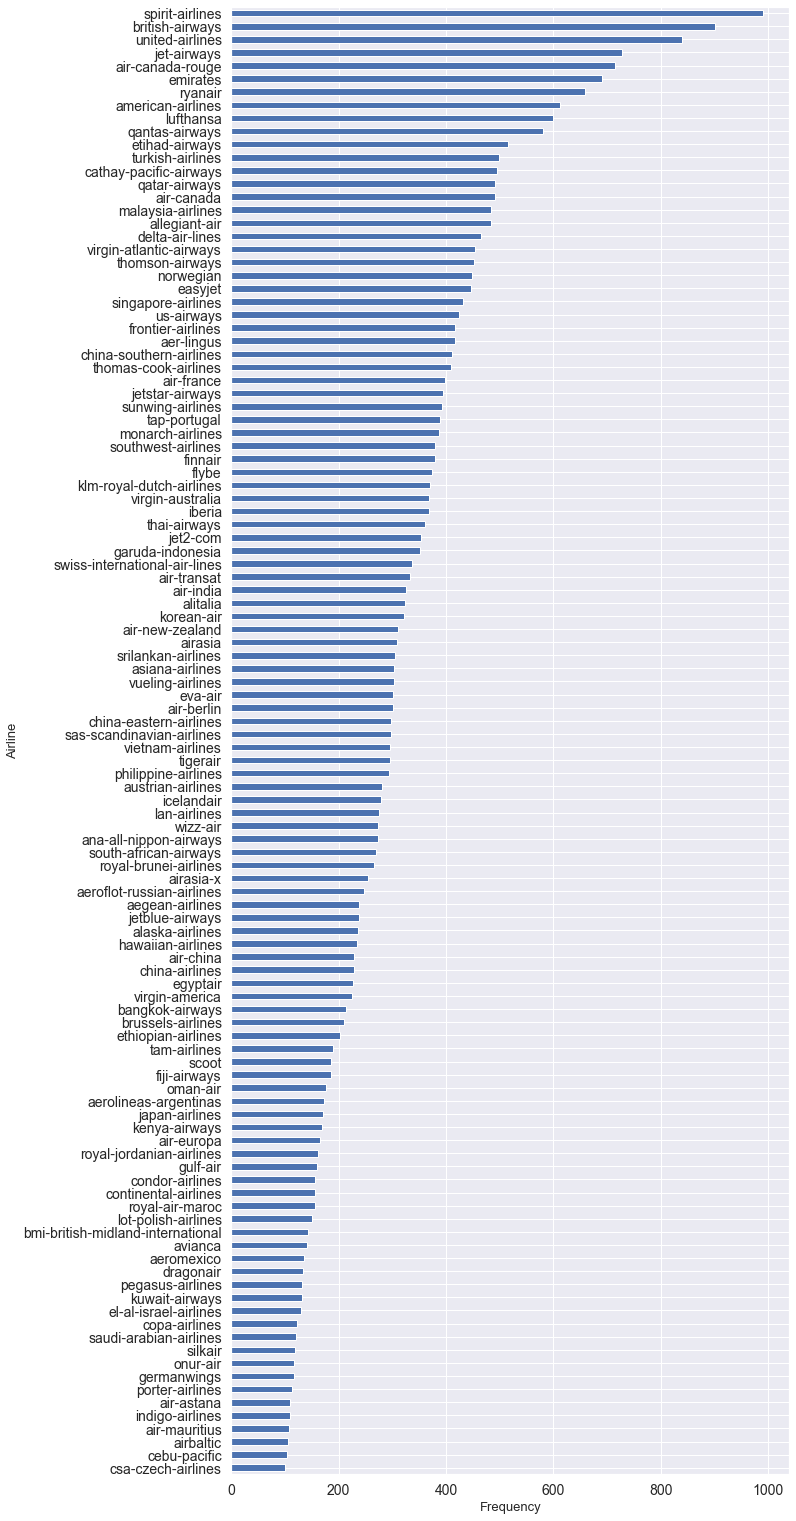

In [18]:
# create a graph for number of reviews per airline
plt.figure(figsize=(10,27))
entries_per_airline.head(112).plot.barh(fontsize=14)
plt.gca().invert_yaxis()
plt.xlabel('Frequency', fontsize=13)
plt.ylabel('Airline', fontsize=13)
plt.show()

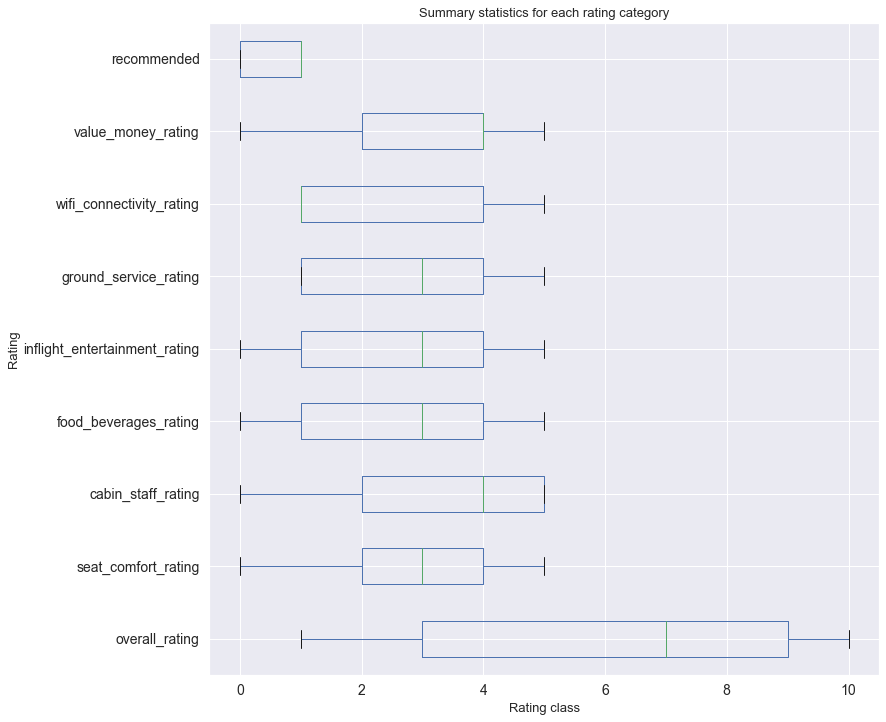

In [171]:
# create a boxplot for each rating feature
data_112_most_entries.plot.box(figsize=(12,12), vert=False, fontsize=14)
plt.xlabel('Rating class', fontsize=13)
plt.ylabel('Rating', fontsize=13)
plt.title('Summary statistics for each rating category', fontsize=13)
plt.show()

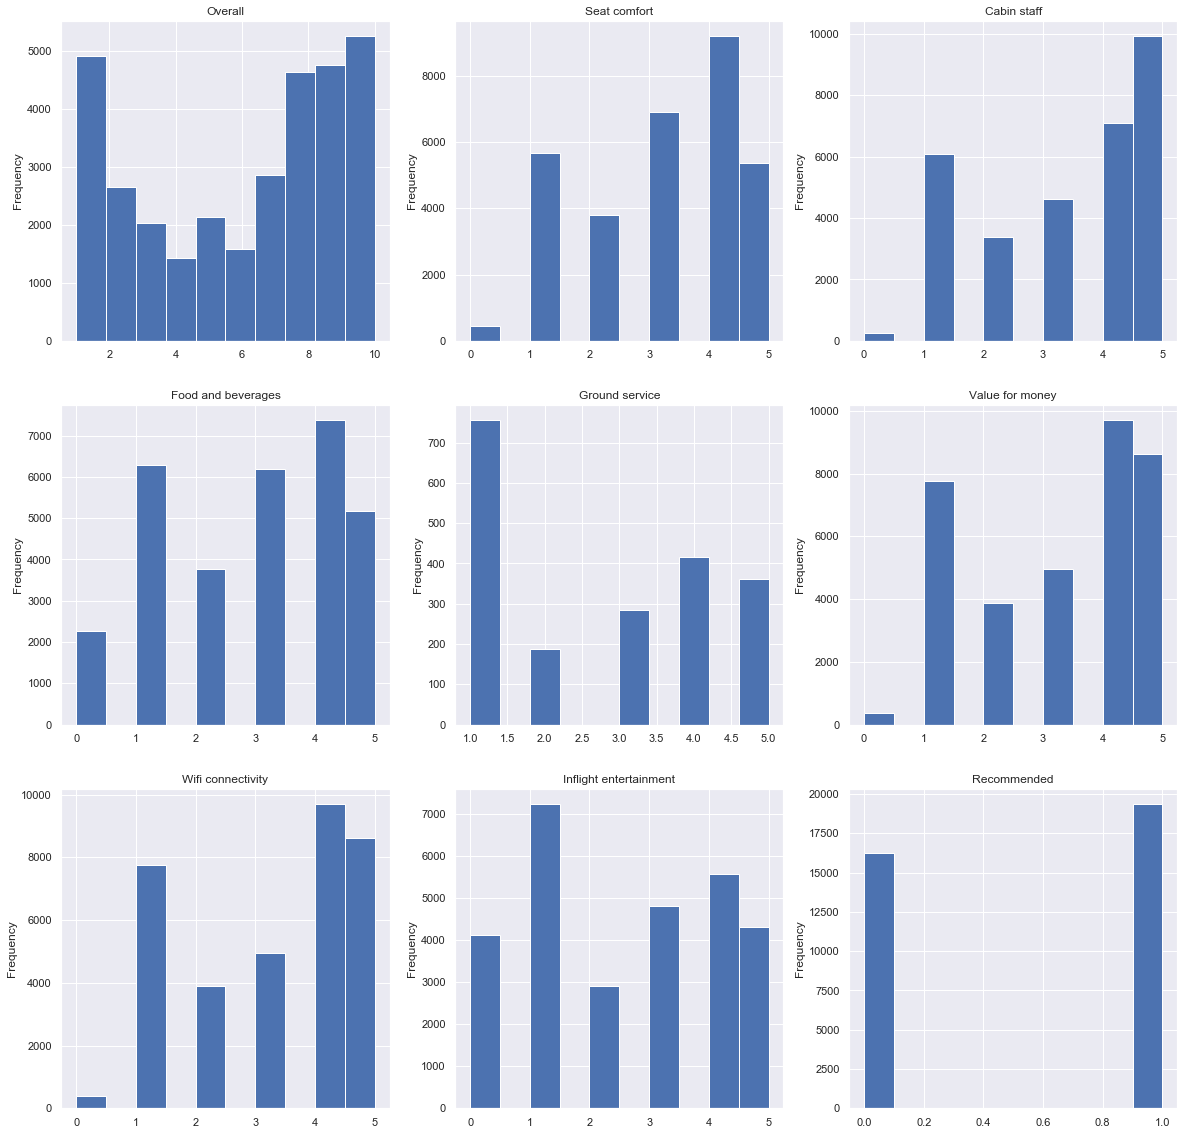

In [86]:
# histogram of features
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

overall_rating = data_112_most_entries['overall_rating'].plot(kind='hist', ax=axes[0, 0])
overall_rating.set_title('Overall')
seat_comfort_rating = data_112_most_entries['seat_comfort_rating'].plot(kind='hist', ax=axes[0, 1])
seat_comfort_rating.set_title('Seat comfort')
cabin_staff_rating = data_112_most_entries['cabin_staff_rating'].plot(kind='hist', ax=axes[0, 2])
cabin_staff_rating.set_title('Cabin staff')
food_beverages_rating = data_112_most_entries['food_beverages_rating'].plot(kind='hist', ax=axes[1, 0])
food_beverages_rating.set_title('Food and beverages')
ground_service_rating = data_112_most_entries['ground_service_rating'].plot(kind='hist', ax=axes[1, 1])
ground_service_rating.set_title('Ground service')
value_money_rating = data_112_most_entries['value_money_rating'].plot(kind='hist', ax=axes[1, 2])
value_money_rating.set_title('Value for money')
wifi_connectivity_rating = data_112_most_entries['value_money_rating'].plot(kind='hist', ax=axes[2, 0])
wifi_connectivity_rating.set_title('Wifi connectivity')
inflight_entertainment_rating = data_112_most_entries['inflight_entertainment_rating'].plot(kind='hist', ax=axes[2, 1])
inflight_entertainment_rating.set_title('Inflight entertainment')
recommended = data_112_most_entries['recommended'].plot(kind='hist', ax=axes[2, 2])
recommended.set_title('Recommended')

plt.show()

### OVERALL RATING

In [32]:
# calculate average overall rating for each airline
data_112_avg_overall_rating = data_112_most_entries.groupby('airline_name')['overall_rating'].mean().sort_values(ascending=False)

In [33]:
# airlines with the highest average overall rating
data_112_avg_overall_rating.head(15)

airline_name
asiana-airlines           8.348837
garuda-indonesia          8.307692
air-astana                8.281553
bangkok-airways           8.122066
indigo-airlines           8.076923
korean-air                8.034921
eva-air                   7.976351
aegean-airlines           7.823789
singapore-airlines        7.773148
airasia-x                 7.707317
oman-air                  7.586826
silkair                   7.565217
ana-all-nippon-airways    7.550562
royal-brunei-airlines     7.542308
dragonair                 7.417323
Name: overall_rating, dtype: float64

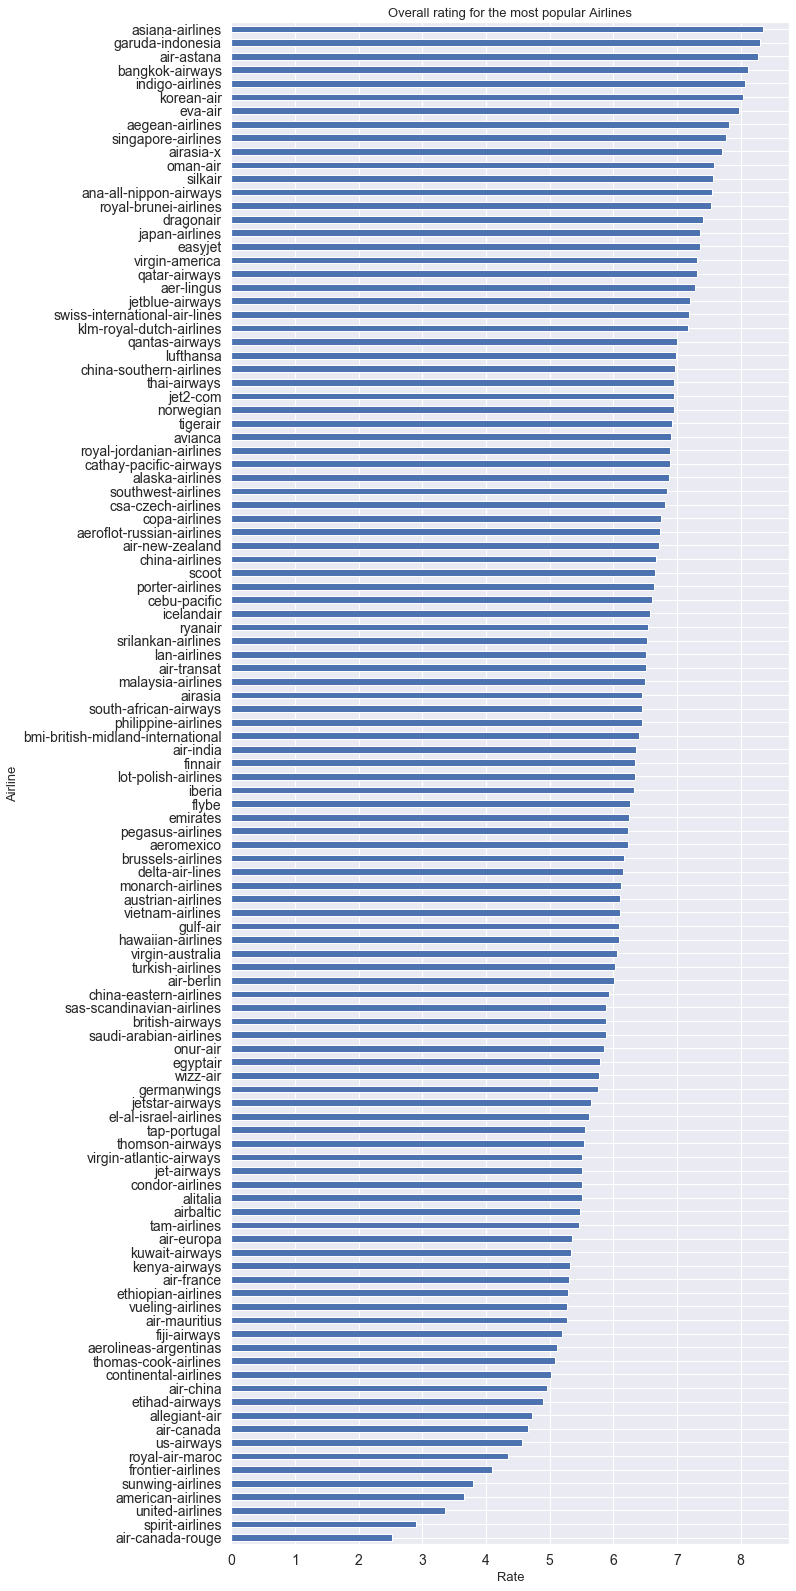

In [34]:
# plot the average overall rating
plt.figure(figsize=(10,28))
data_112_avg_overall_rating.plot.barh(fontsize=14)
plt.title('Overall rating for the most popular Airlines', fontsize=13)
plt.ylabel('Airline', fontsize=13)
plt.xlabel('Rate', fontsize=13)
plt.gca().invert_yaxis()
plt.show()

### RATING BASED ON THE FLIGHT CLASS

In [80]:
# check unique flight classes
data_112_most_entries.cabin_flown.unique()

array(['Business Class', 'Economy', 'Premium Economy', 'First Class', nan],
      dtype=object)

In [81]:
# check number of reviews based on the flight class
data_112_most_entries.groupby('cabin_flown')['overall_rating'].count().sort_values(ascending=False)

cabin_flown
Economy            23001
Business Class      5776
Premium Economy     1408
First Class          810
Name: overall_rating, dtype: int64

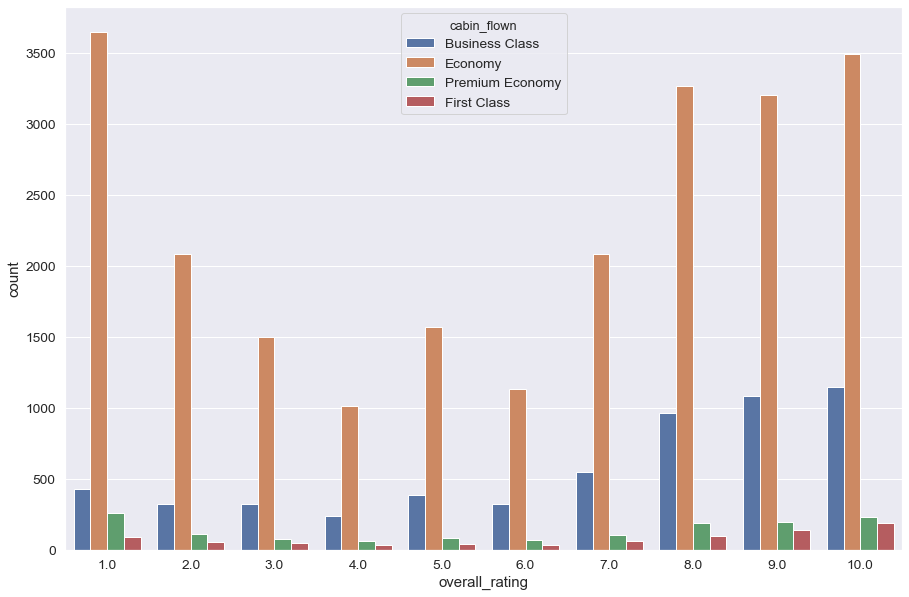

In [201]:
# plot number of overall rating for each flight class
plt.figure(figsize=(15, 10))
_ = sns.countplot(x='overall_rating', hue='cabin_flown', data=data_112_most_entries)
plt.show()

In [82]:
# calculate average rating based on the flight class
data_112_most_entries.groupby('cabin_flown')['overall_rating'].mean().sort_values(ascending=False)

cabin_flown
Business Class     6.875693
First Class        6.622222
Economy            5.892570
Premium Economy    5.833097
Name: overall_rating, dtype: float64

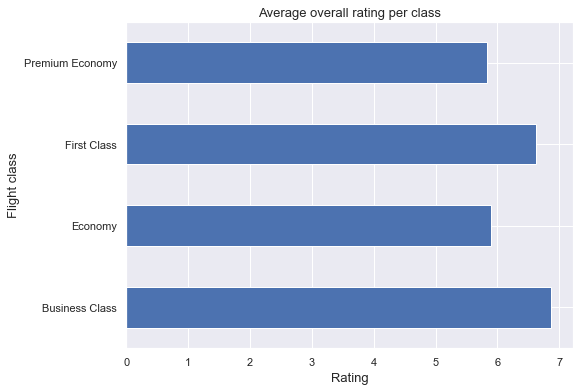

In [83]:
# plot average overal rating based on the flight class
data_112_most_entries.groupby('cabin_flown')['overall_rating'].mean().plot.barh(figsize=(8,6))
plt.ylabel('Flight class', fontsize=13)
plt.xlabel('Rating', fontsize=13)
plt.title('Average overall rating per class', fontsize=13)
plt.show()

### OVERALL RATING BASED ON THE AIRLINE AND CABIN FLOWN

In [36]:
# calculate average, minimum, maximum rating for each airline based on the flight class
data_112_stats = data_112_most_entries.groupby(['airline_name', 'cabin_flown']).agg({'overall_rating': ['mean', max, min, sum, 'count', 'median', 'std']})

In [37]:
data_112_stats

overall_rating                     \
                                                    mean   max  min     sum   
airline_name              cabin_flown                                         
aegean-airlines           Business Class        7.958333  10.0  3.0   191.0   
                          Economy               7.807882  10.0  1.0  1585.0   
aer-lingus                Business Class        8.488372  10.0  2.0   365.0   
                          Economy               7.138235  10.0  1.0  2427.0   
aeroflot-russian-airlines Business Class        7.647059  10.0  1.0   260.0   
...                                                  ...   ...  ...     ...   
vueling-airlines          Business Class        4.333333   9.0  2.0    13.0   
                          Economy               5.314159  10.0  1.0  1201.0   
                          First Class           3.000000   3.0  3.0     3.0   
                          Premium Economy       1.000000   1.0  1.0     1.0   
wizz-air                  Economy               5.777778  10.0  1.0  1300.0   

                                                                  
                                          count median       std  
airline_name              cabin_flown                             
aegean-airlines           Business Class     24    9.0  2.422345  
                          Economy           203    9.0  2.582795  
aer-lingus                Business Class     43    9.0  2.153315  
                          Economy           340    8.0  2.820334  
aeroflot-russian-airlines Business Class     34    8.0  1.952192  
...                                         ...    ...       ...  
vueling-airlines          Business Class      3    2.0  4.041452  
                          Economy           226    6.0  3.403720  
                          First Class         1    3.0       NaN  
                          Premium Economy     1    1.0       NaN  
wizz-air                  Economy           225    7.0  3.184006  

[335 rows x 7 columns]

In [38]:
# check the stats for airline with the most reviews
data_112_stats.loc['spirit-airlines']

overall_rating                                         
                          mean   max  min    sum count median       std
cabin_flown                                                            
Business Class        2.000000   6.0  1.0   10.0     5    1.0  2.236068
Economy               2.358209  10.0  1.0  632.0   268    1.0  2.872843
First Class           5.750000  10.0  2.0   23.0     4    5.5  4.349329
Premium Economy       2.142857   8.0  1.0   15.0     7    1.0  2.609506

Out of curiosity, let's check overall rating for the 15 airlines with the most reviews:

In [76]:
# getting airlines name
airlines_15_most_entries = list(entries_per_airline.head(15).index)

In [79]:
airlines_15_most_entries

['spirit-airlines',
 'british-airways',
 'united-airlines',
 'jet-airways',
 'air-canada-rouge',
 'emirates',
 'ryanair',
 'american-airlines',
 'lufthansa',
 'qantas-airways',
 'etihad-airways',
 'turkish-airlines',
 'cathay-pacific-airways',
 'qatar-airways',
 'air-canada']

In [84]:
# create a dataframe with top 15 most popular airlines
data_15_most_entries = data_112_most_entries.loc[data_112_most_entries['airline_name'].isin(airlines_15_most_entries)]

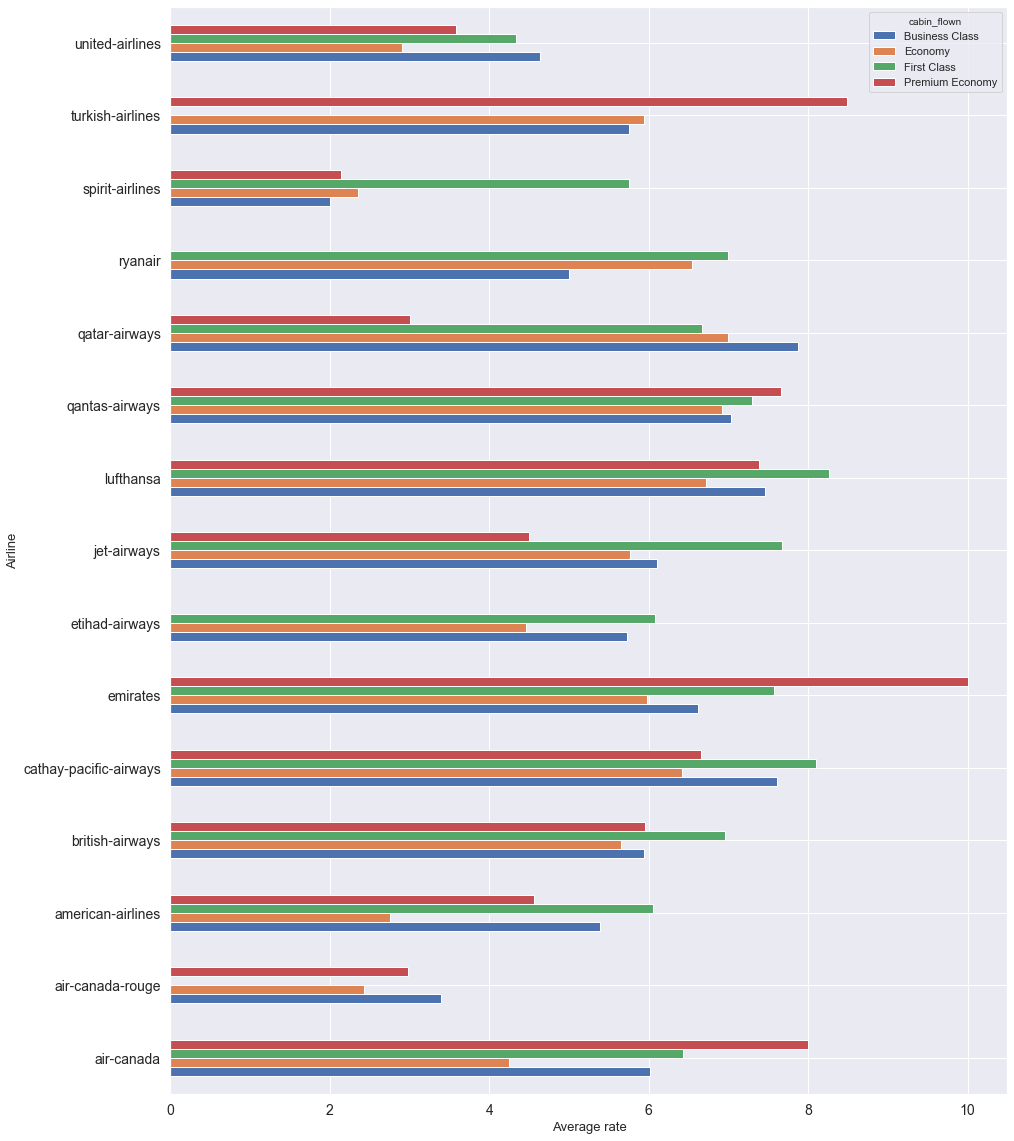

In [85]:
# plot average rating for top 15 popular airlines
data_15_most_entries.groupby(['airline_name', 'cabin_flown'])['overall_rating'].mean().unstack().plot(kind='barh', stacked=False, figsize = (15,20), fontsize=14)
plt.ylabel('Airline', fontsize=13)
plt.xlabel('Average rate', fontsize=13)
plt.show()

### RATING BASED ON THE PASSENGER'S COUNTRY

In [46]:
# check all various countries
data_112_most_entries.author_country.unique()

array(['Australia', 'United Kingdom', 'Belgium', 'United States',
       'Greece', 'Italy', 'Switzerland', 'Germany', 'Canada', 'Sweden',
       'Singapore', 'Egypt', 'Israel', 'Ireland', 'Malaysia', 'Cyprus',
       'Spain', 'Turkey', 'China', 'Poland', 'Slovakia', 'New Zealand',
       'Czech Republic', 'India', 'Netherlands', 'Russian Federation',
       'Hungary', 'Argentina', 'Romania', 'France', 'Ukraine', 'Denmark',
       'Bermuda', 'Thailand', 'Chile', 'Brazil', 'Mexico', 'Iran',
       'Colombia', 'Philippines', 'Hong Kong', 'Latvia', 'Lithuania',
       'Austria', 'Japan', nan, 'Peru', 'Norway', 'Costa Rica',
       'South Africa', 'Trinidad & Tobago', 'Serbia', 'Bahamas',
       'Estonia', 'Kazakhstan', 'Uzbekistan', 'Bulgaria', 'Croatia',
       'Portugal', 'United Arab Emirates', 'Finland', 'Indonesia',
       'Taiwan', 'Slovenia', 'Namibia', 'Qatar', 'Saudi Arabia',
       'Vietnam', 'Brunei', 'Morocco', 'Bahrain', 'Iceland', 'Luxembourg',
       'Kuwait', 'South Korea',

In [55]:
# check number of overall rating for each country
country_count = data_112_most_entries.groupby('author_country')['overall_rating'].count().sort_values(ascending=False)
country_count

author_country
United Kingdom    7922
United States     6741
Australia         4363
Canada            2716
Germany            949
                  ... 
Mauritania           1
Senegal              0
Cameroon             0
Azerbaijan           0
Liechtenstein        0
Name: overall_rating, Length: 147, dtype: int64

In [59]:
# get summary stats for overall rating based on the author's country
country_overall_stats = data_112_most_entries.groupby('author_country').agg({'overall_rating': ['mean', max, min, 'count', 'median', 'std']})
country_overall_stats

overall_rating                                  
                                  mean   max  min count median       std
author_country                                                          
Albania                       7.500000   9.0  6.0     2    7.5  2.121320
Andorra                       3.500000   5.0  2.0     2    3.5  2.121320
Angola                        4.600000  10.0  1.0     5    3.0  4.159327
Argentina                     6.926829  10.0  1.0    41    8.0  2.858236
Australia                     6.506532  10.0  1.0  4363    8.0  3.032854
...                                ...   ...  ...   ...    ...       ...
Venezuela                     5.625000   8.0  1.0     8    7.0  2.722263
Vietnam                       6.686567  10.0  1.0    67    7.0  2.990941
Wallis & Futuna Islands       7.000000   7.0  7.0     1    7.0       NaN
Zambia                        7.000000  10.0  1.0     7    9.0  3.464102
Zimbabwe                      4.333333   7.0  2.0     3    4.0  2.516611

[147 rows x 6 columns]

In [56]:
# create a graph for the 15 countries with highest number of reviews
countries_15 = list(country_count.head(15).index)

In [68]:
# create a dataframe for top 15 countries based on the number of reviews
top_countries_15_reviews = data_112_most_entries.loc[data_112_most_entries['author_country'].isin(countries_15)]

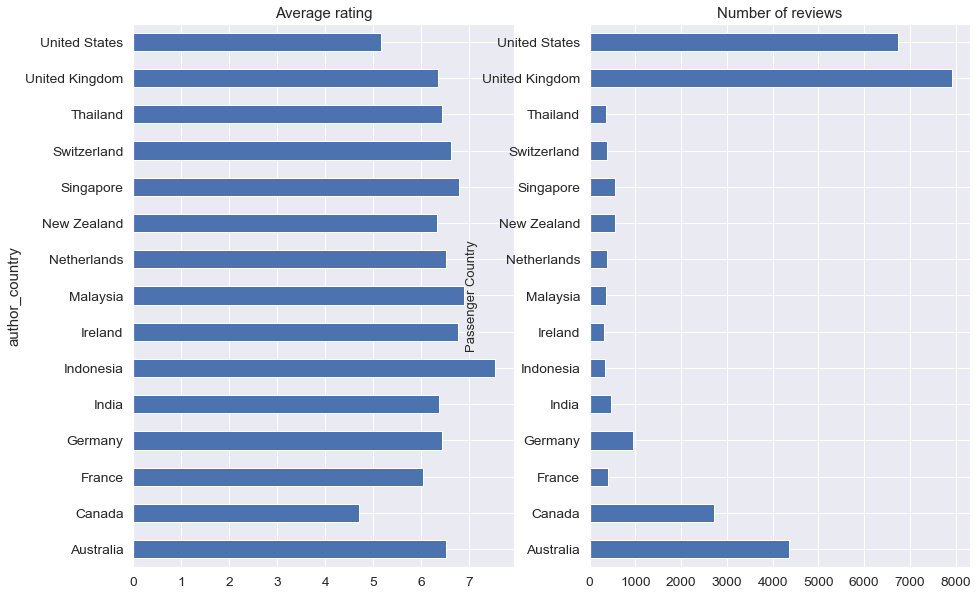

In [222]:
fig, ax = plt.subplots(ncols = 2, figsize=(15, 10))
top_countries_15_reviews.groupby('author_country')['overall_rating'].mean().plot.barh(ax=ax[0], title='Average rating')
top_countries_15_reviews.groupby('author_country')['overall_rating'].count().plot.barh(ax=ax[1], title='Number of reviews')
#plt.xlabel('Average Rating', fontsize=13)
plt.ylabel('Passenger Country', fontsize=13)
plt.show()

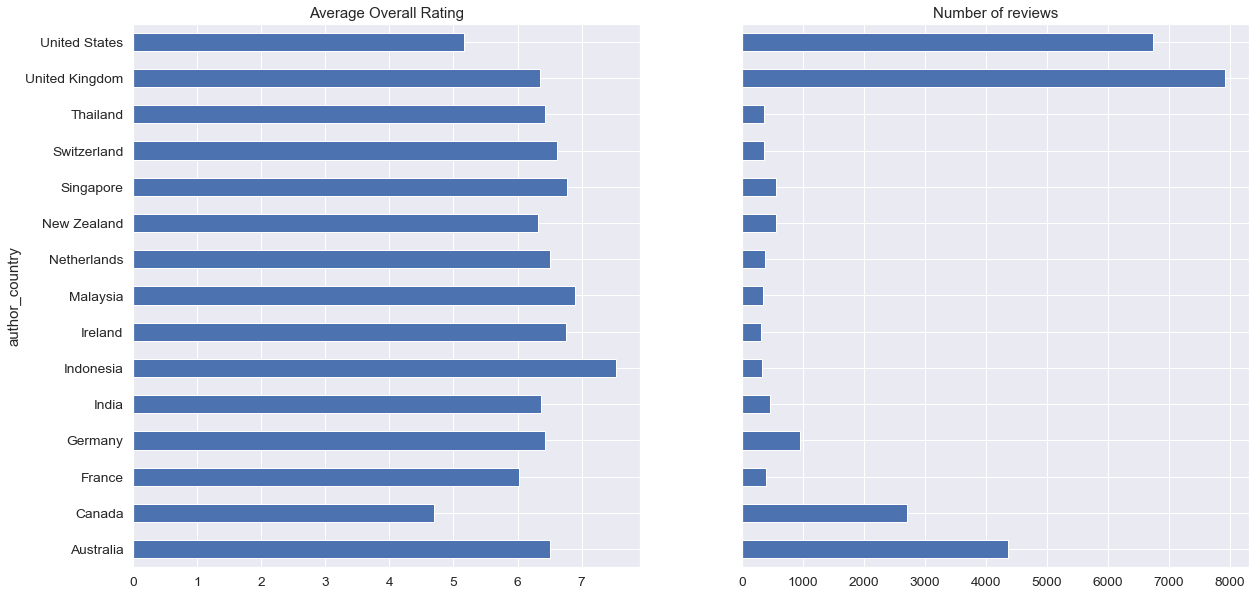

In [220]:
# plot an average rating and number of ratings per country
fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

top_countries_15_reviews.groupby('author_country')['overall_rating'].mean().plot(kind='barh', ax=axes1)
axes1.set_title('Average Overall Rating')
top_countries_15_reviews.groupby('author_country')['overall_rating'].count().plot(kind='barh', ax=axes2)
axes2.set_title('Number of reviews')  
plt.show()

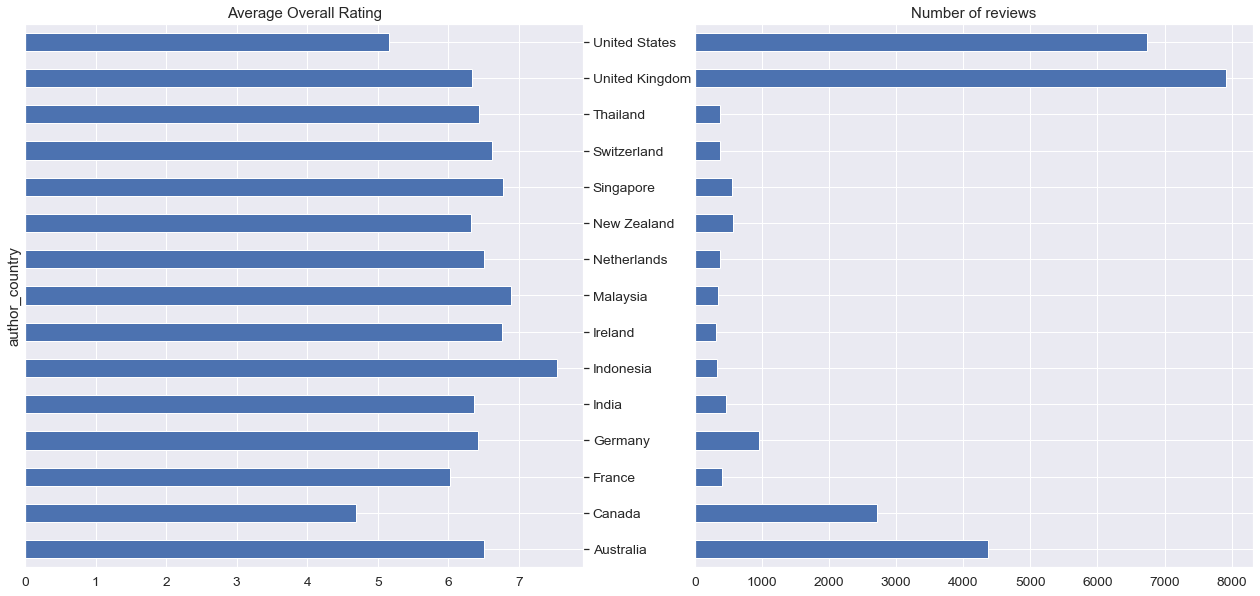

In [215]:
# plot an average rating and number of ratings per country
fig, axarr = plt.subplots(1,2, figsize=(22,10), sharey=True)

top_countries_15_reviews.groupby('author_country')['overall_rating'].mean().plot(kind='barh', ax=axarr[0], title='Average Overall Rating')
axarr[0].yaxis.tick_right()
top_countries_15_reviews.groupby('author_country')['overall_rating'].count().plot(kind='barh', ax=axarr[1], title='Number of reviews')
plt.show()

#### OVERALL RATING BASED ON THE AIRCRAFT

In [126]:
# check aircraft with the most reviews
aircraft_count = reviews_airline.groupby('aircraft').size().sort_values(ascending=False)

In [127]:
aircraft_count

aircraft
A320                                 132
A330                                  74
Boeing 737-800                        61
A380                                  52
Boeing 777                            48
                                    ... 
Boeing 737-800WL                       1
Boeing 737-900ER , Boeing 757-200      1
Boeing 737/747                         1
Boeing 737/900                         1
319                                    1
Length: 363, dtype: int64

In [129]:
# number of overall rating reviews per aircraft
aircraft_overall_count = data_112_most_entries.groupby('aircraft')['overall_rating'].count().sort_values(ascending=False)

In [134]:
aircraft_overall_count

aircraft
A320                               112
A330                                72
Boeing 737-800                      52
A380                                52
Boeing 777                          47
                                  ... 
Boeing 737-800 / Boeing 777          1
Boeing 737-800 / 747-400             1
Boeing 737-800 & Boeing 737-900      1
Boeing 737-7/800                     1
319                                  1
Name: overall_rating, Length: 324, dtype: int64

In [131]:
# average overall rating per aircraft
aircraft_overall_mean = data_112_most_entries.groupby('aircraft')['overall_rating'].mean().sort_values(ascending=False)

In [132]:
aircraft_overall_mean

aircraft
B747 400                     10.0
Cityhopper                   10.0
B777-200; A380; B787         10.0
Boeing 737 - 800             10.0
Boeing 737 and Boeing 847    10.0
                             ... 
B767-300                      1.0
Boeing 700LR                  1.0
Boeing 737/900                1.0
Boeing 777-200 / 737-800      1.0
A321/A340                     1.0
Name: overall_rating, Length: 324, dtype: float64

In [135]:
# create a list of top 15 aircrafts by number of reviews
top_15_aircrafts = list(aircraft_overall_count.head(15).index)

In [136]:
# create a dataframe for top 15 aircrafts
top_15_aircrafts_df = data_112_most_entries.loc[data_112_most_entries['aircraft'].isin(top_15_aircrafts)]

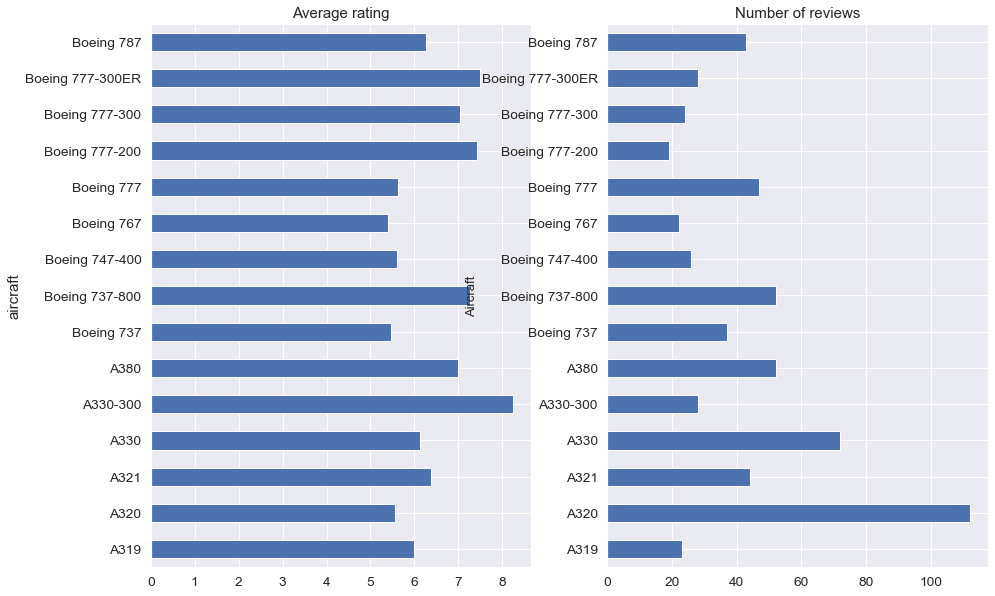

In [221]:
# plot a number of reviews and average overall reviews for each aircraft
fig, ax = plt.subplots(ncols = 2, figsize=(15, 10))

top_15_aircrafts_df.groupby('aircraft')['overall_rating'].mean().plot.barh(ax=ax[0], title='Average rating')
top_15_aircrafts_df.groupby('aircraft')['overall_rating'].count().plot.barh(ax=ax[1], title='Number of reviews')
plt.ylabel('Aircraft', fontsize=13)
plt.show()

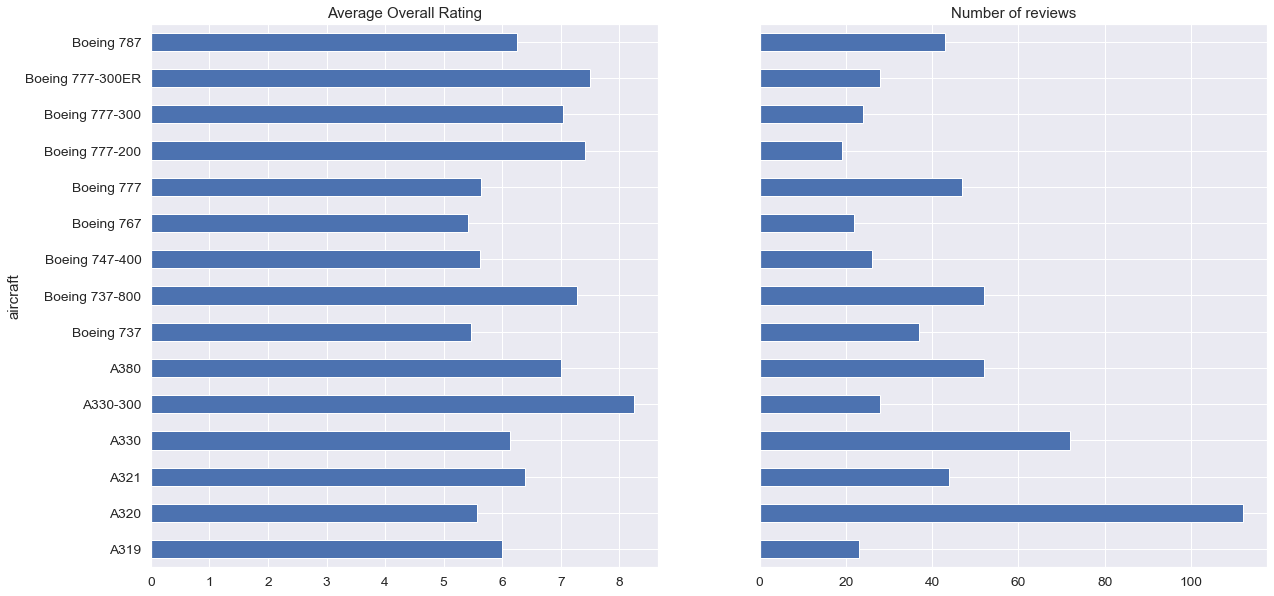

In [223]:
# plot an average rating and number of ratings per aircraft
fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

top_15_aircrafts_df.groupby('aircraft')['overall_rating'].mean().plot(kind='barh', ax=axes1)
axes1.set_title('Average Overall Rating')
#axes1.yaxis.tick_right()
top_15_aircrafts_df.groupby('aircraft')['overall_rating'].count().plot(kind='barh', ax=axes2)
axes2.set_title('Number of reviews')  
plt.show()

#### OVERALL RATING BASED ON THE TRAVELLER TYPE

In [153]:
# check traveller type with the most reviews
traveller_count_overall = data_112_most_entries.groupby('type_traveller').size().sort_values(ascending=False)

In [154]:
traveller_count_overall

type_traveller
Solo Leisure      732
FamilyLeisure     559
Couple Leisure    544
Business          329
dtype: int64

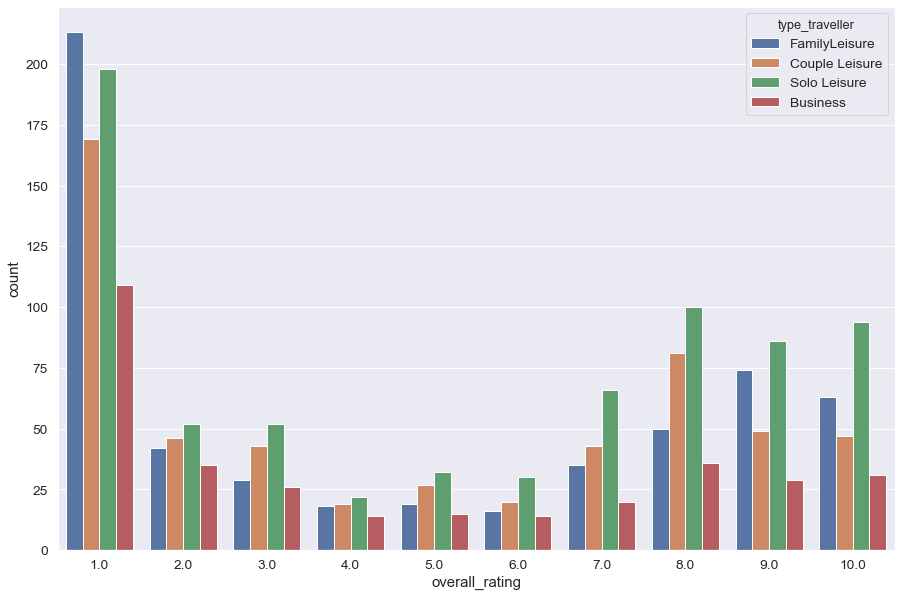

In [225]:
# plot number of reviews per traveller type
plt.figure(figsize=(15,10))
_ = sns.countplot(x='overall_rating', hue='type_traveller', data=data_112_most_entries)
plt.show()

In [155]:
# check traveller type with the average overall review
traveller_mean_overall = data_112_most_entries.groupby('type_traveller')['overall_rating'].mean().sort_values(ascending=False)

In [156]:
traveller_mean_overall

type_traveller
Solo Leisure      5.275956
Couple Leisure    4.744485
FamilyLeisure     4.629696
Business          4.471125
Name: overall_rating, dtype: float64

### RECOMMENDATION BASED ON THE AIRLINE

In [93]:
# number of recommended reviews per airline
recommend_count = data_112_most_entries.groupby('airline_name')['recommended'].count().sort_values(ascending=False)

In [94]:
recommend_count

airline_name
spirit-airlines       990
british-airways       901
united-airlines       840
jet-airways           727
air-canada-rouge      715
                     ... 
indigo-airlines       109
air-mauritius         108
airbaltic             106
cebu-pacific          103
csa-czech-airlines    100
Name: recommended, Length: 112, dtype: int64

In [95]:
# calculate average recommendation for each airline
recommend_mean = data_112_most_entries.groupby('airline_name')['recommended'].mean().sort_values(ascending=False)

In [96]:
recommend_mean

airline_name
garuda-indonesia     0.911932
air-astana           0.899083
asiana-airlines      0.861386
eva-air              0.831126
silkair              0.830508
                       ...   
united-airlines      0.246429
us-airways           0.244706
frontier-airlines    0.211031
spirit-airlines      0.206061
air-canada-rouge     0.137063
Name: recommended, Length: 112, dtype: float64

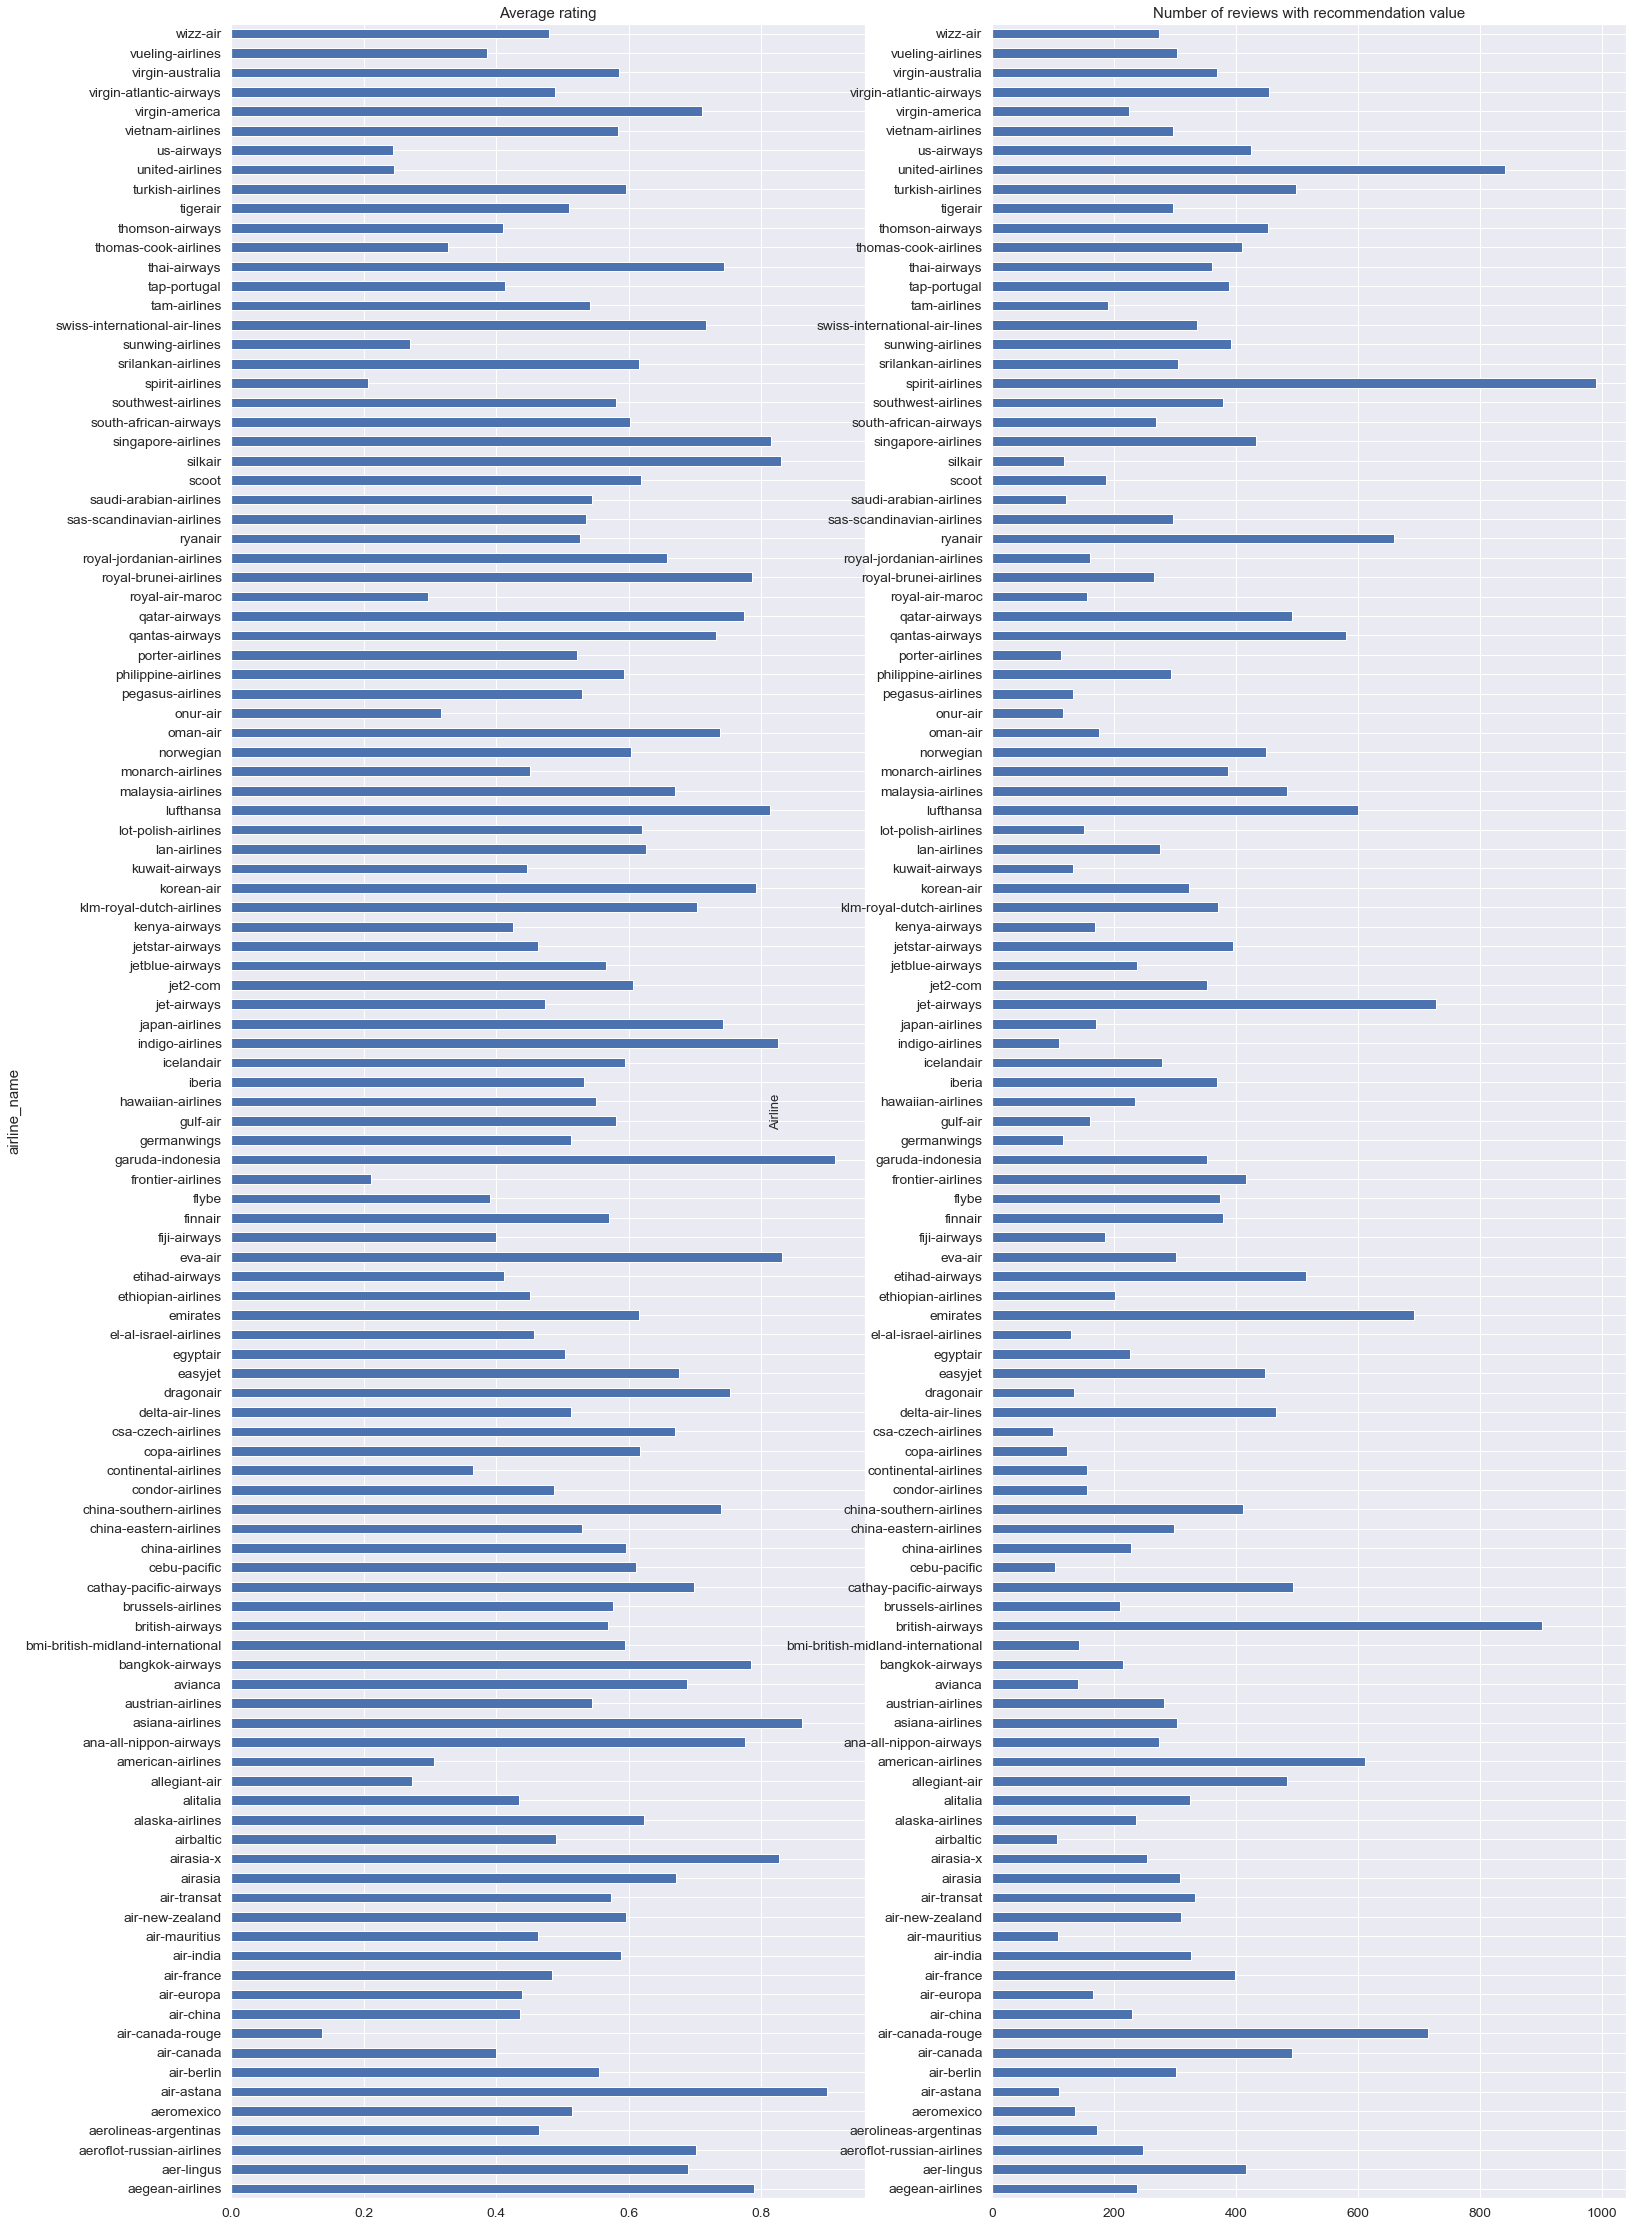

In [304]:
# plot an average recommendation rating and number of ratings per airline
fig, ax = plt.subplots(ncols = 2, figsize=(25, 40))

data_112_most_entries.groupby('airline_name')['recommended'].mean().plot.barh(ax=ax[0], title='Average rating')
data_112_most_entries.groupby('airline_name')['recommended'].count().plot.barh(ax=ax[1], title='Number of reviews with recommendation value')
plt.ylabel('Airline', fontsize=13)
plt.show()

### RECOMMENDATION BASED ON THE FLIGHT CLASS

In [101]:
# check number of recommendations based on the flight class
data_112_most_entries.groupby('cabin_flown')['recommended'].count().sort_values(ascending=False)

cabin_flown
Economy            25862
Business Class      5962
Premium Economy     1473
First Class          841
Name: recommended, dtype: int64

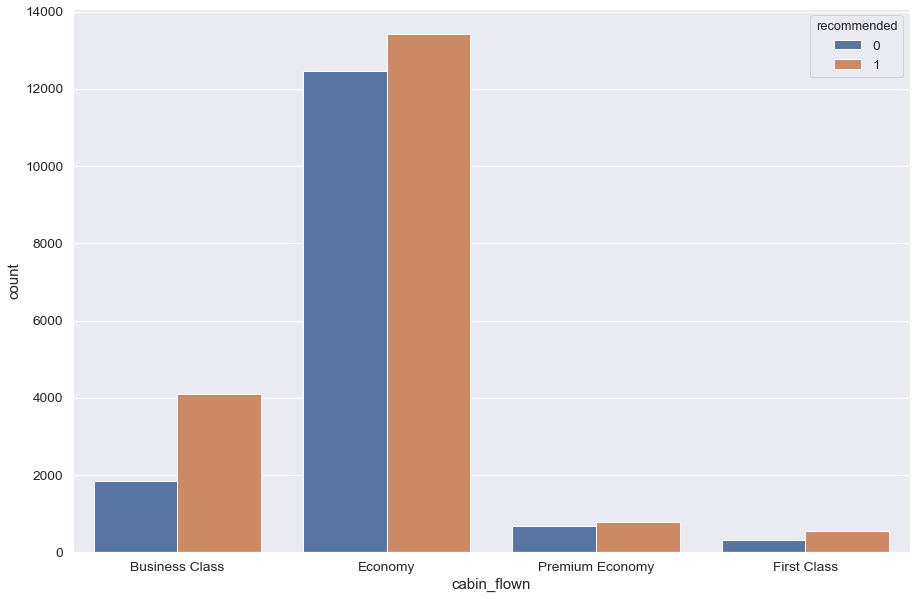

In [195]:
plt.figure(figsize=(15, 10))
_ = sns.countplot(x='cabin_flown', hue='recommended', data=data_112_most_entries)
plt.show()

In [102]:
# check average recommendation based on the flight class
data_112_most_entries.groupby('cabin_flown')['recommended'].mean().sort_values(ascending=False)

cabin_flown
Business Class     0.689031
First Class        0.638526
Premium Economy    0.537678
Economy            0.518483
Name: recommended, dtype: float64

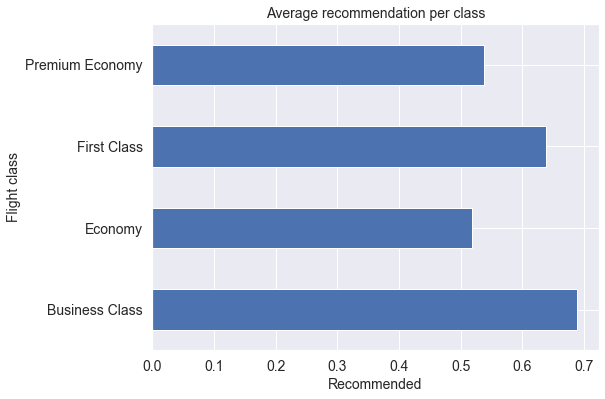

In [270]:
# plot average recommendation rating based on the flight class
data_112_most_entries.groupby('cabin_flown')['recommended'].mean().plot.barh(figsize=(8,6), fontsize=14)
plt.ylabel('Flight class', fontsize=14)
plt.xlabel('Recommended', fontsize=14)
plt.title('Average recommendation per class', fontsize=14)
plt.show()

### RECOMMENDATION BASED ON THE AIRLINE AND CABIN FLOWN

In [109]:
# calculate average, minimum, maximum recommendation for each airline based on the flight class
data_112_stats_recom = data_112_most_entries.groupby(['airline_name', 'cabin_flown']).agg({'recommended': ['mean', max, min, sum, 'count', 'median', 'std']})

In [110]:
data_112_stats_recom

recommended                     \
                                                 mean max min  sum count   
airline_name              cabin_flown                                      
aegean-airlines           Business Class     0.769231   1   0   20    26   
                          Economy            0.792453   1   0  168   212   
aer-lingus                Business Class     0.844444   1   0   38    45   
                          Economy            0.671159   1   0  249   371   
aeroflot-russian-airlines Business Class     0.911765   1   0   31    34   
...                                               ...  ..  ..  ...   ...   
vueling-airlines          Business Class     0.333333   1   0    1     3   
                          Economy            0.389262   1   0  116   298   
                          First Class        0.000000   0   0    0     1   
                          Premium Economy    0.000000   0   0    0     1   
wizz-air                  Economy            0.479853   1   0  131   273   

                                                            
                                          median       std  
airline_name              cabin_flown                       
aegean-airlines           Business Class     1.0  0.429669  
                          Economy            1.0  0.406511  
aer-lingus                Business Class     1.0  0.366529  
                          Economy            1.0  0.470426  
aeroflot-russian-airlines Business Class     1.0  0.287902  
...                                          ...       ...  
vueling-airlines          Business Class     0.0  0.577350  
                          Economy            0.0  0.488403  
                          First Class        0.0       NaN  
                          Premium Economy    0.0       NaN  
wizz-air                  Economy            0.0  0.500511  

[335 rows x 7 columns]

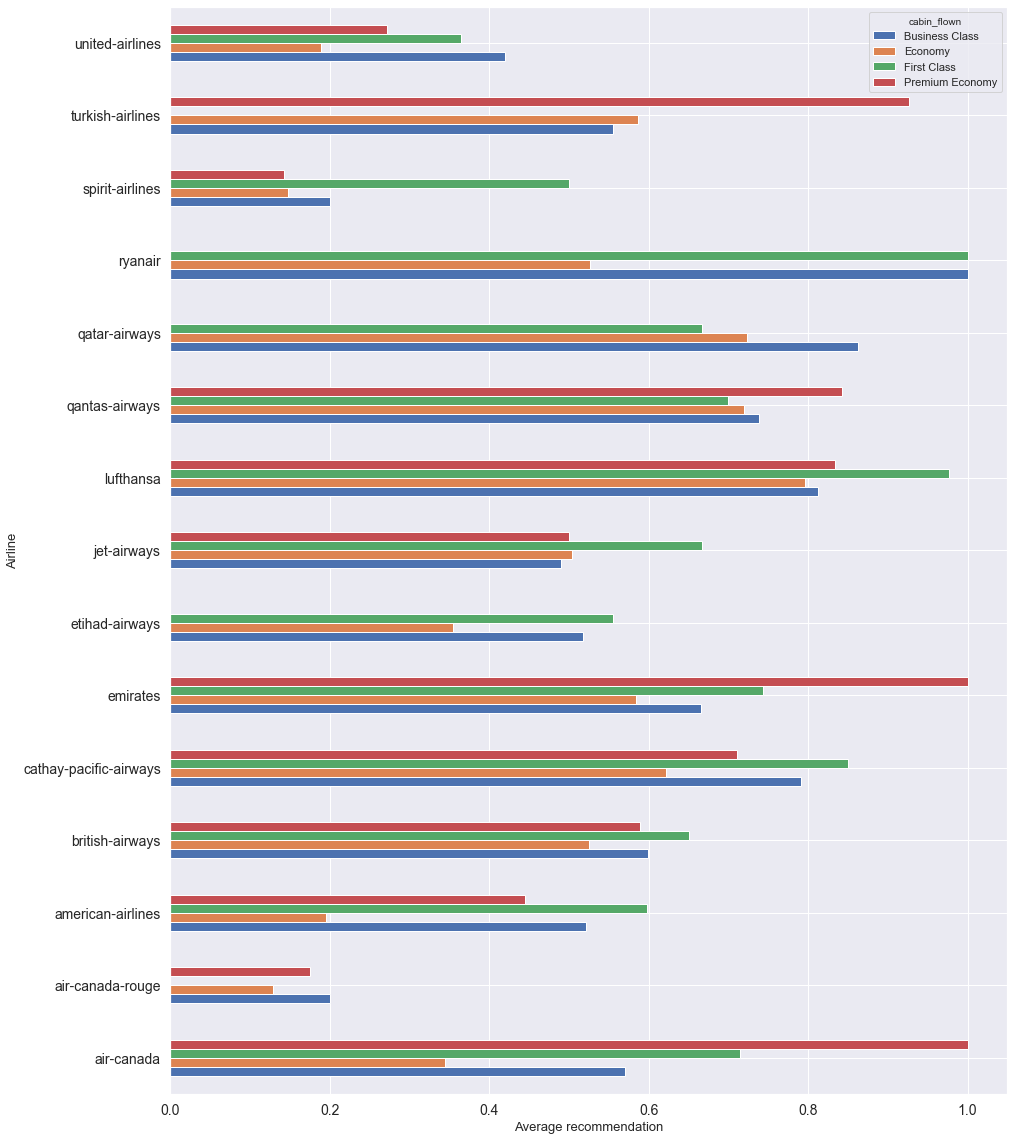

In [111]:
# plot average recommendation for top 15 popular airlines for each flight class
data_15_most_entries.groupby(['airline_name', 'cabin_flown'])['recommended'].mean().unstack().plot(kind='barh', stacked=False, figsize = (15,20), fontsize=14)
plt.ylabel('Airline', fontsize=13)
plt.xlabel('Average recommendation', fontsize=13)
plt.show()

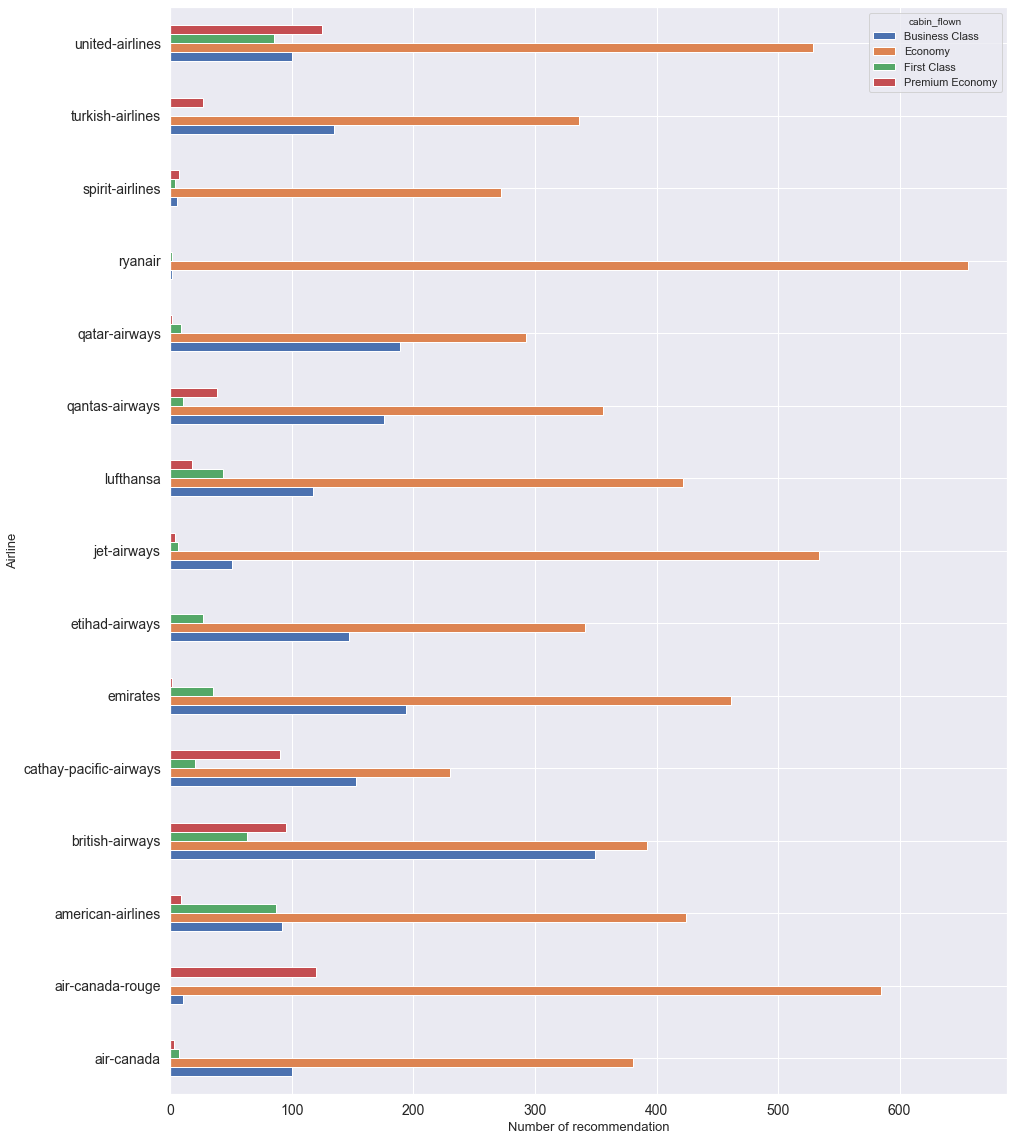

In [112]:
# plot number of recommendations for top 15 popular airlines for each flight class
data_15_most_entries.groupby(['airline_name', 'cabin_flown'])['recommended'].count().unstack().plot(kind='barh', stacked=False, figsize = (15,20), fontsize=14)
plt.ylabel('Airline', fontsize=13)
plt.xlabel('Number of recommendation', fontsize=13)
plt.show()

#### RECOMMENDATION BASED ON THE PASSENGER'S COUNTRY

In [114]:
# get summary stats for recommended rating based on the author's country
country_recommend_stats = data_112_most_entries.groupby('author_country').agg({'recommended': ['mean', max, min, 'count', 'median', 'std']})
country_recommend_stats

recommended                               
                               mean max min count median       std
author_country                                                    
Albania                    1.000000   1   1     2    1.0  0.000000
Andorra                    0.500000   1   0     2    0.5  0.707107
Angola                     0.400000   1   0     5    0.0  0.547723
Argentina                  0.727273   1   0    44    1.0  0.450511
Australia                  0.620248   1   0  4682    1.0  0.485377
...                             ...  ..  ..   ...    ...       ...
Venezuela                  0.625000   1   0     8    1.0  0.517549
Vietnam                    0.661972   1   0    71    1.0  0.476405
Wallis & Futuna Islands    1.000000   1   1     1    1.0       NaN
Zambia                     0.571429   1   0     7    1.0  0.534522
Zimbabwe                   0.333333   1   0     3    0.0  0.577350

[147 rows x 6 columns]

In [115]:
# counting recommended rating per country
country_recomm_count = data_112_most_entries.groupby('author_country')['recommended'].count().sort_values(ascending=False)
country_recomm_count

author_country
United Kingdom                      8990
United States                       7803
Australia                           4682
Canada                              2939
Germany                              979
                                    ... 
Iran                                   1
Democratic Republic of the Congo       1
East Timor                             1
Georgia                                1
Mauritania                             1
Name: recommended, Length: 147, dtype: int64

We can extract the same countries as before (for overall rating) and see what was recommendation based on the passenger's country:

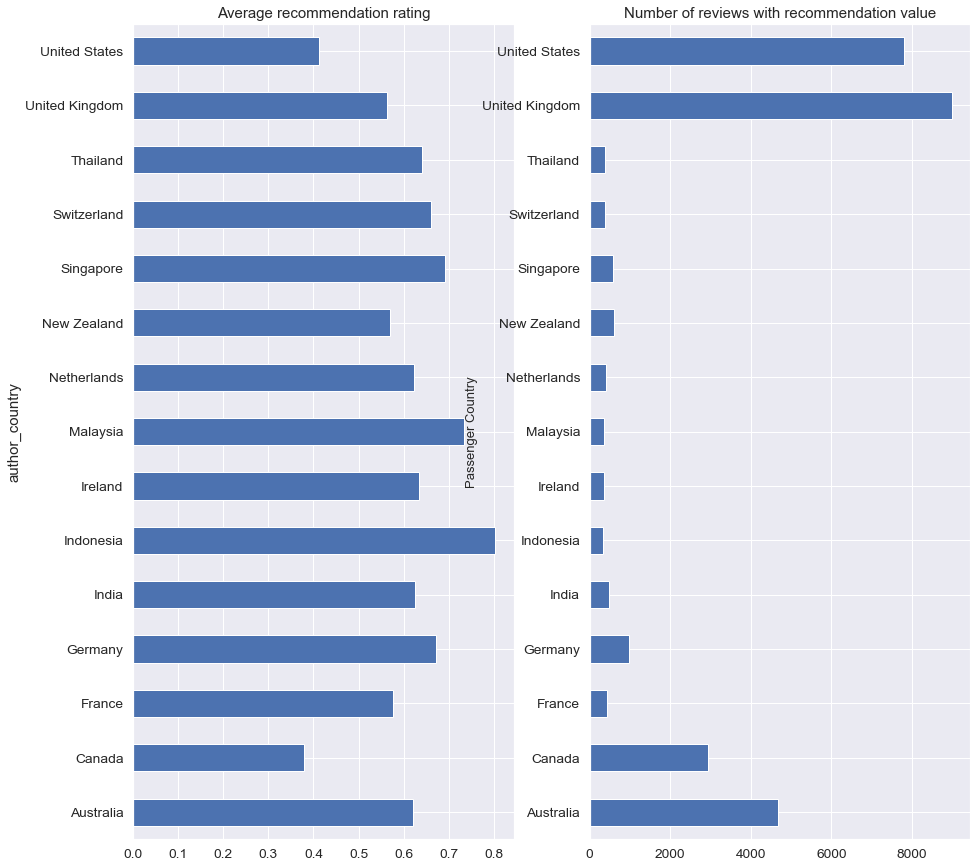

In [305]:
# plot a graph for average recommended rating and number of recommendations for top 15 countries from where reviews came
fig, ax = plt.subplots(ncols = 2, figsize=(15, 15))

top_countries_15_reviews.groupby('author_country')['recommended'].mean().plot.barh(ax=ax[0], title='Average recommendation rating')
top_countries_15_reviews.groupby('author_country')['recommended'].count().plot.barh(ax=ax[1], title='Number of reviews with recommendation value')
plt.ylabel('Passenger Country', fontsize=13)
plt.show()

#### RECOMMENDATION BASED ON THE AIRCRAFT

In [147]:
# number of recommendation reviews per aircraft
aircraft_recomm_count = data_112_most_entries.groupby('aircraft')['recommended'].count().sort_values(ascending=False)

In [148]:
aircraft_recomm_count

aircraft
A320                               112
A330                                72
Boeing 737-800                      52
A380                                52
Boeing 777                          47
                                  ... 
Boeing 737-800 / Boeing 777          1
Boeing 737-800 / 747-400             1
Boeing 737-800 & Boeing 737-900      1
Boeing 737-7/800                     1
319                                  1
Name: recommended, Length: 324, dtype: int64

In [149]:
# average recommended rating per aircraft
aircraft_recomm_mean = data_112_most_entries.groupby('aircraft')['recommended'].mean().sort_values(ascending=False)

In [150]:
aircraft_recomm_mean

aircraft
B747 400                   1.0
A320 and Q400              1.0
B787/B77-300ER             1.0
A321 / Boeing 777-300ER    1.0
B787-900                   1.0
                          ... 
A320/B777-200ER            0.0
Boeing 737 / Boeing 787    0.0
Boeing 700LR               0.0
A321 / Boeing 747-400      0.0
319                        0.0
Name: recommended, Length: 324, dtype: float64

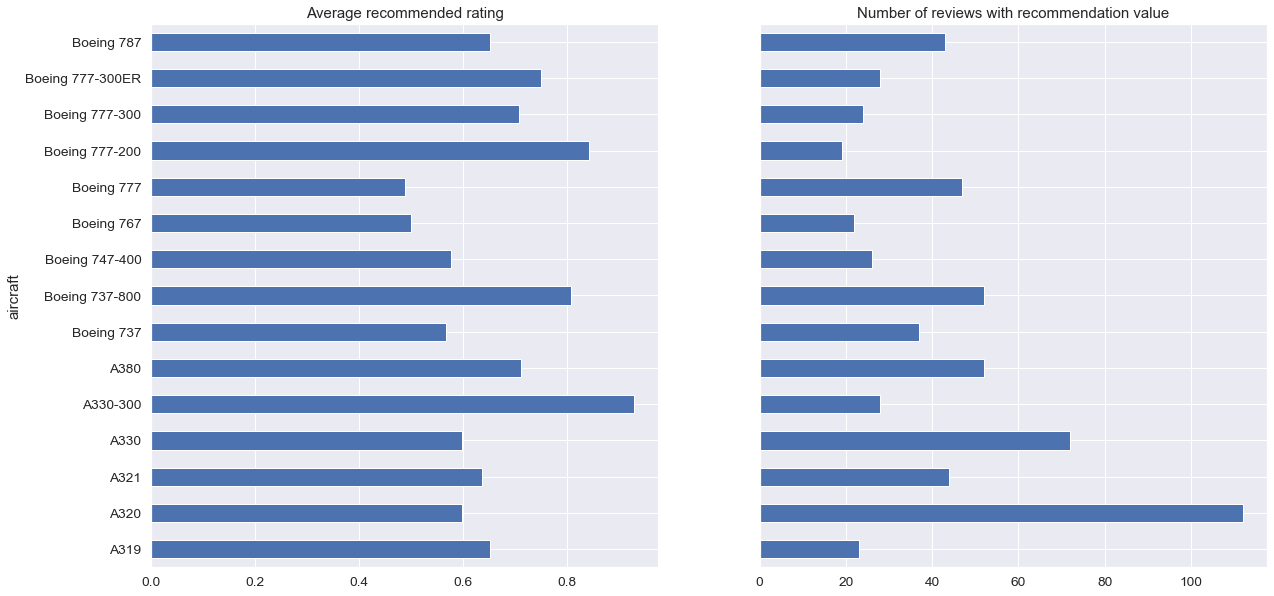

In [306]:
# plot an average recommended rating and their number per aircraft
fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

top_15_aircrafts_df.groupby('aircraft')['recommended'].mean().plot(kind='barh', ax=axes1)
axes1.set_title('Average recommended rating')
#axes1.yaxis.tick_right()
top_15_aircrafts_df.groupby('aircraft')['recommended'].count().plot(kind='barh', ax=axes2)
axes2.set_title('Number of reviews with recommendation value')  
plt.show()

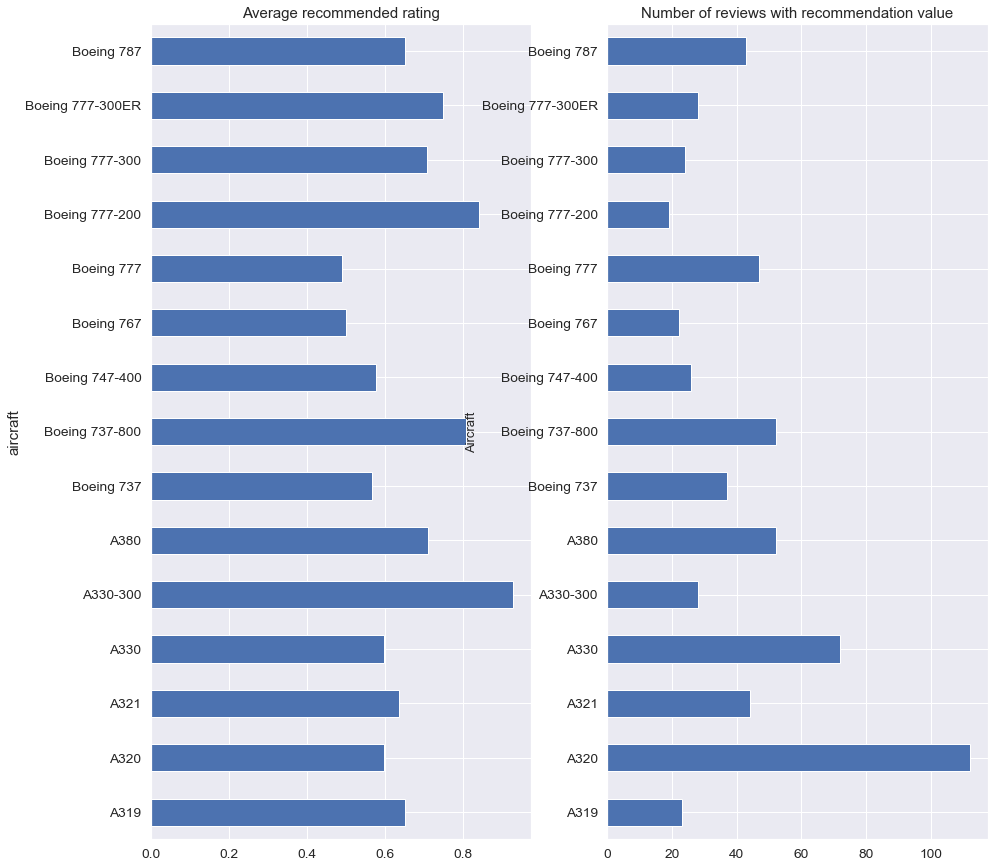

In [307]:
# plotting for the same aircrafts as for overall rating
# plot a number of reviews and average recommended reviews for each aircraft
fig, ax = plt.subplots(ncols = 2, figsize=(15, 15))

top_15_aircrafts_df.groupby('aircraft')['recommended'].mean().plot.barh(ax=ax[0], title='Average recommended rating')
top_15_aircrafts_df.groupby('aircraft')['recommended'].count().plot.barh(ax=ax[1], title='Number of reviews with recommendation value')
#plt.xlabel('Average Rating', fontsize=13)
plt.ylabel('Aircraft', fontsize=13)
plt.show()

#### RECOMMENDED BASED ON THE TRAVELLER TYPE

In [157]:
# check traveller type with the most recommended reviews
traveller_count_recomm = data_112_most_entries.groupby('type_traveller')['recommended'].count().sort_values(ascending=False)

In [158]:
traveller_count_recomm

type_traveller
Solo Leisure      732
FamilyLeisure     559
Couple Leisure    544
Business          329
Name: recommended, dtype: int64

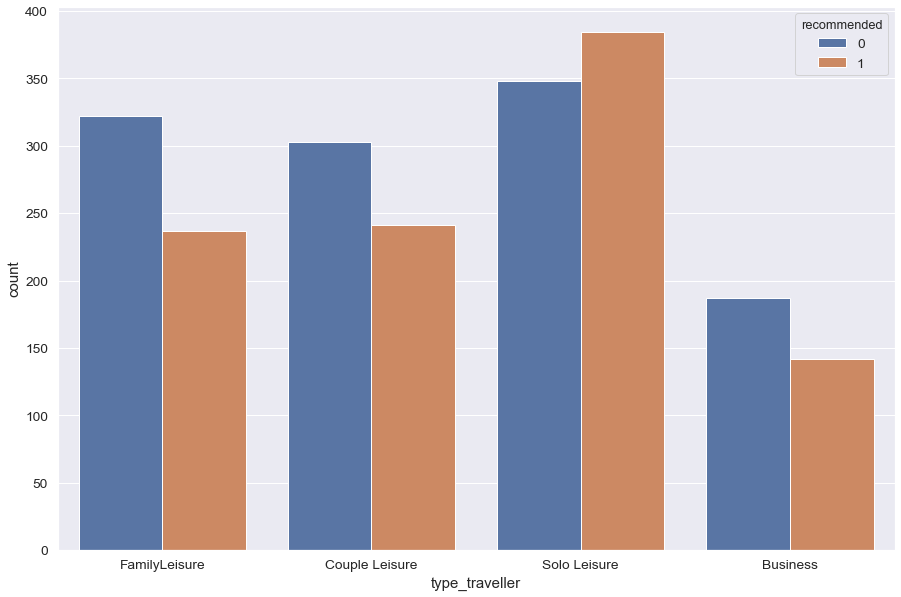

In [194]:
# number of recommended rating based on a traveller
plt.figure(figsize=(15, 10))
sns.countplot(x='type_traveller', hue='recommended', data=data_112_most_entries)
plt.show()

In [159]:
# check traveller type with the average recommended review
traveller_mean_recomm = data_112_most_entries.groupby('type_traveller')['recommended'].mean().sort_values(ascending=False)

In [160]:
traveller_mean_recomm

type_traveller
Solo Leisure      0.524590
Couple Leisure    0.443015
Business          0.431611
FamilyLeisure     0.423971
Name: recommended, dtype: float64

### RECOMMENDED AND OVERALL RATING

In [235]:
# group the dataframe by airline and flight class and extract a number of stats for each group
data_112_most_entries.groupby(['airline_name', 'cabin_flown']).agg({'overall_rating': ['mean', max, min, 'count', sum],
                                                                    'recommended': ['mean', max, min, 'count', sum]})

overall_rating                   \
                                                    mean   max  min count   
airline_name              cabin_flown                                       
aegean-airlines           Business Class        7.958333  10.0  3.0    24   
                          Economy               7.807882  10.0  1.0   203   
aer-lingus                Business Class        8.488372  10.0  2.0    43   
                          Economy               7.138235  10.0  1.0   340   
aeroflot-russian-airlines Business Class        7.647059  10.0  1.0    34   
...                                                  ...   ...  ...   ...   
vueling-airlines          Business Class        4.333333   9.0  2.0     3   
                          Economy               5.314159  10.0  1.0   226   
                          First Class           3.000000   3.0  3.0     1   
                          Premium Economy       1.000000   1.0  1.0     1   
wizz-air                  Economy               5.777778  10.0  1.0   225   

                                                  recommended                \
                                              sum        mean max min count   
airline_name              cabin_flown                                         
aegean-airlines           Business Class    191.0    0.769231   1   0    26   
                          Economy          1585.0    0.792453   1   0   212   
aer-lingus                Business Class    365.0    0.844444   1   0    45   
                          Economy          2427.0    0.671159   1   0   371   
aeroflot-russian-airlines Business Class    260.0    0.911765   1   0    34   
...                                           ...         ...  ..  ..   ...   
vueling-airlines          Business Class     13.0    0.333333   1   0     3   
                          Economy          1201.0    0.389262   1   0   298   
                          First Class         3.0    0.000000   0   0     1   
                          Premium Economy     1.0    0.000000   0   0     1   
wizz-air                  Economy          1300.0    0.479853   1   0   273   

                                                
                                           sum  
airline_name              cabin_flown           
aegean-airlines           Business Class    20  
                          Economy          168  
aer-lingus                Business Class    38  
                          Economy          249  
aeroflot-russian-airlines Business Class    31  
...                                        ...  
vueling-airlines          Business Class     1  
                          Economy          116  
                          First Class        0  
                          Premium Economy    0  
wizz-air                  Economy          131  

[335 rows x 10 columns]

<Figure size 432x288 with 0 Axes>

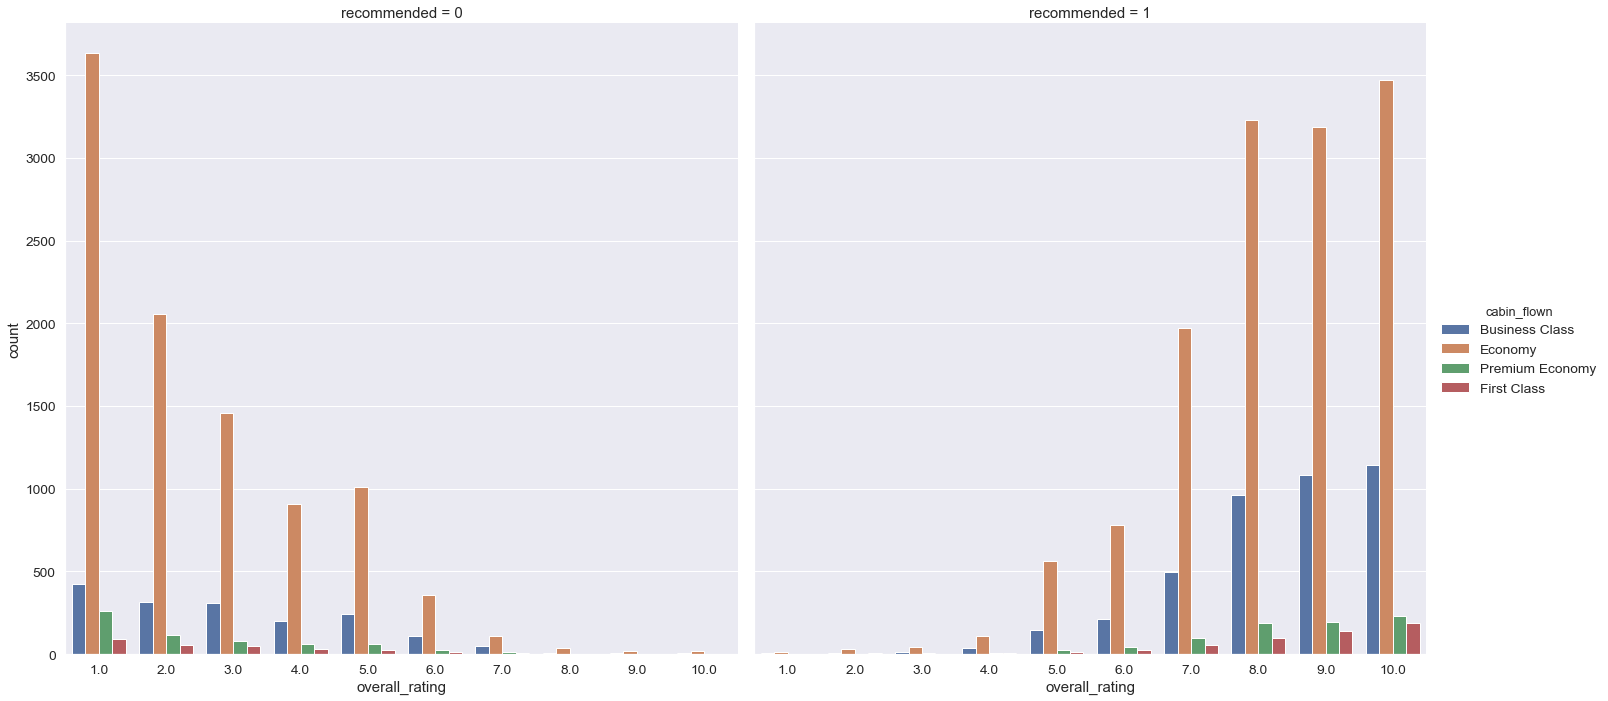

In [265]:
# plot overall rating based on the flight class and recommendation
plt.figure()
_  = sns.catplot(x='overall_rating', hue='cabin_flown', col='recommended', data=data_112_most_entries, kind='count', height=10)
plt.show()

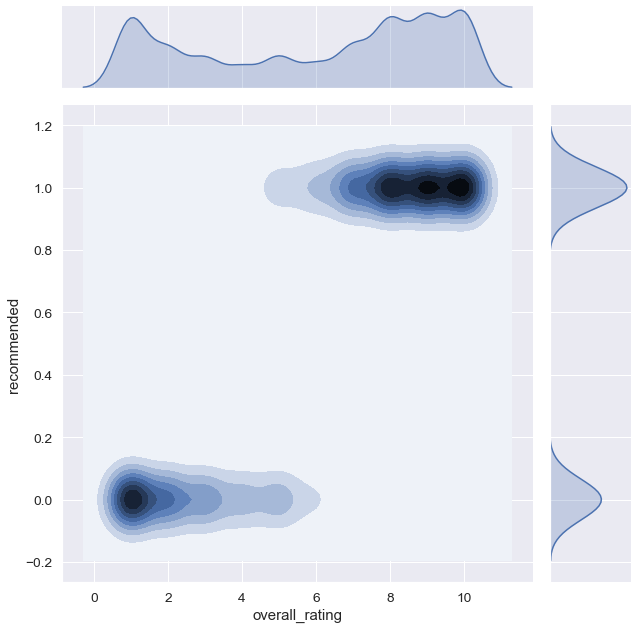

In [268]:
# plot kernel density estimation between overall rating and recommended
sns.jointplot(x='overall_rating', y='recommended', data=data_112_most_entries, kind='kde', height=9);

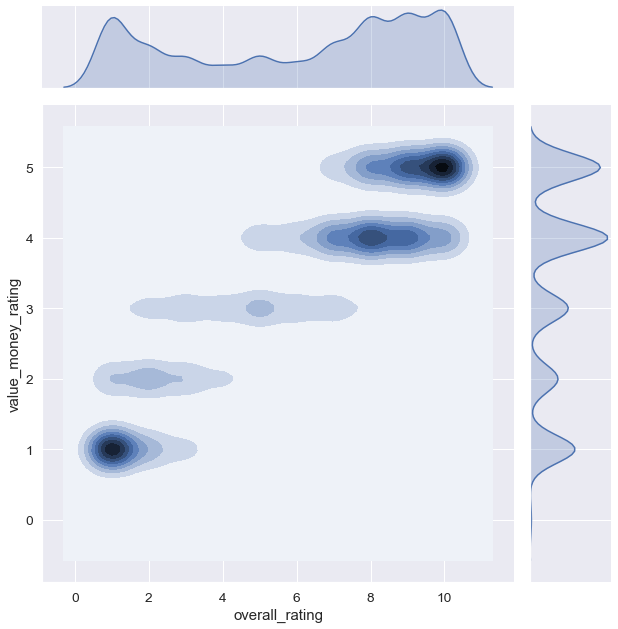

In [271]:
# plot kernel density estimation between overall rating and value for the money
sns.jointplot(x='overall_rating', y='value_money_rating', data=data_112_most_entries, kind='kde', height=9);

<Figure size 432x288 with 0 Axes>

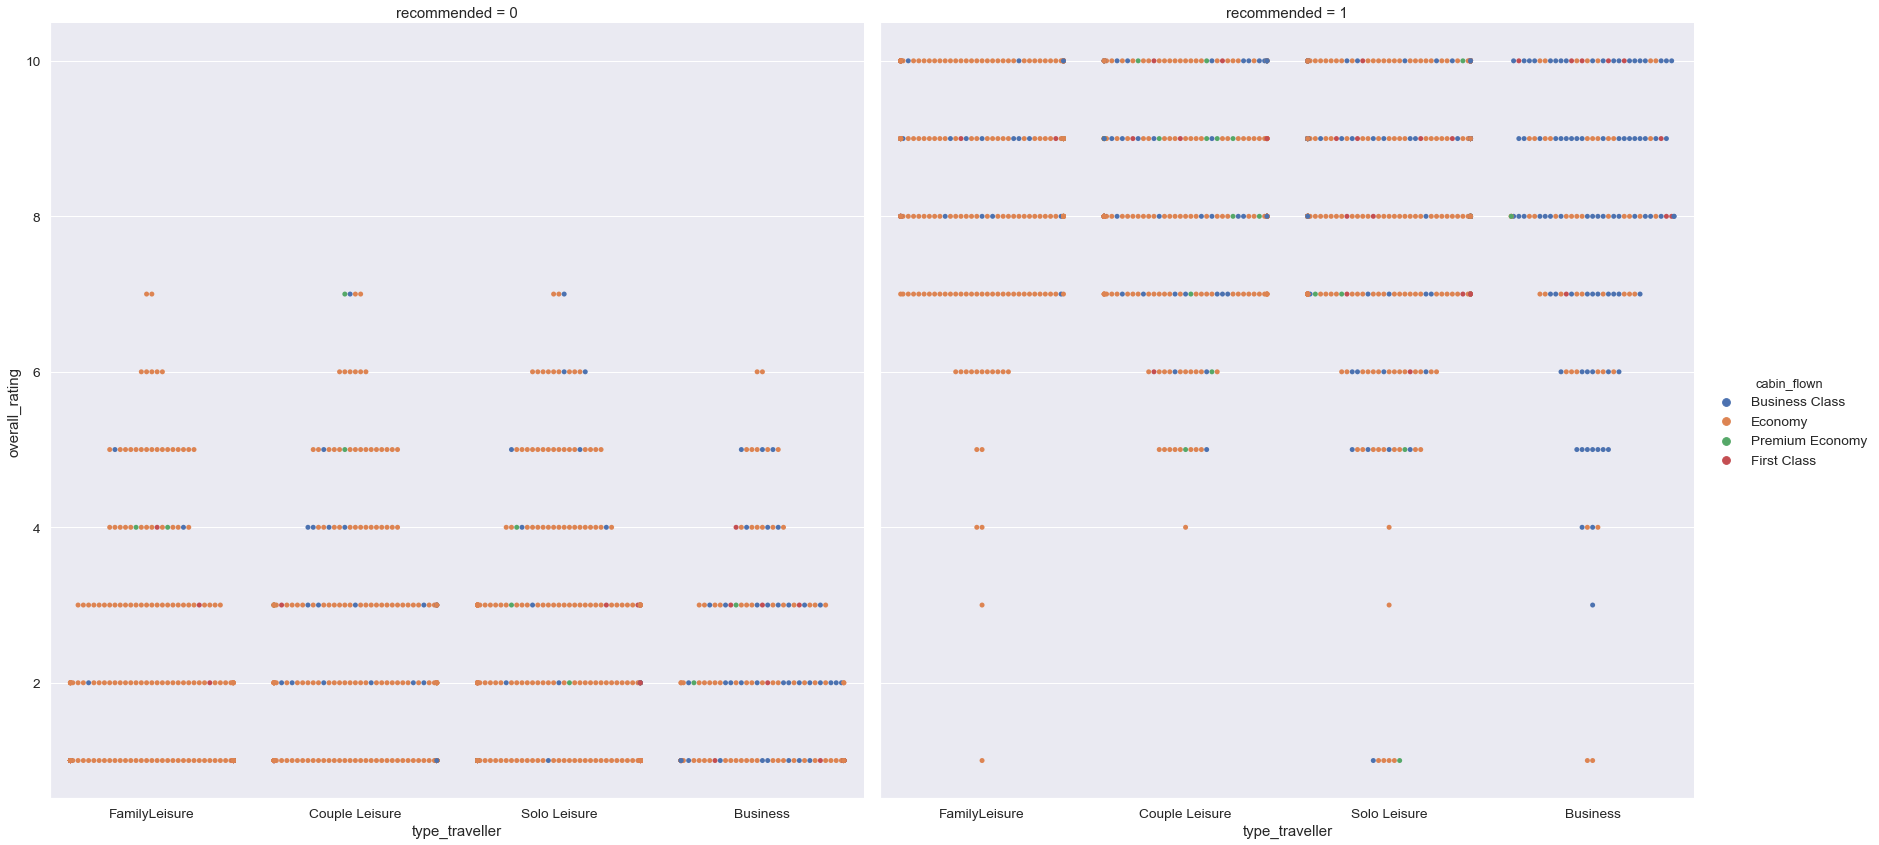

In [280]:
# plot recommended and overall rating based on the flight class and traveller type
plt.figure()
_  = sns.catplot(x='type_traveller', y='overall_rating', hue='cabin_flown', col='recommended', kind='swarm', data=data_112_most_entries, height=12)
plt.show()

<Figure size 432x288 with 0 Axes>

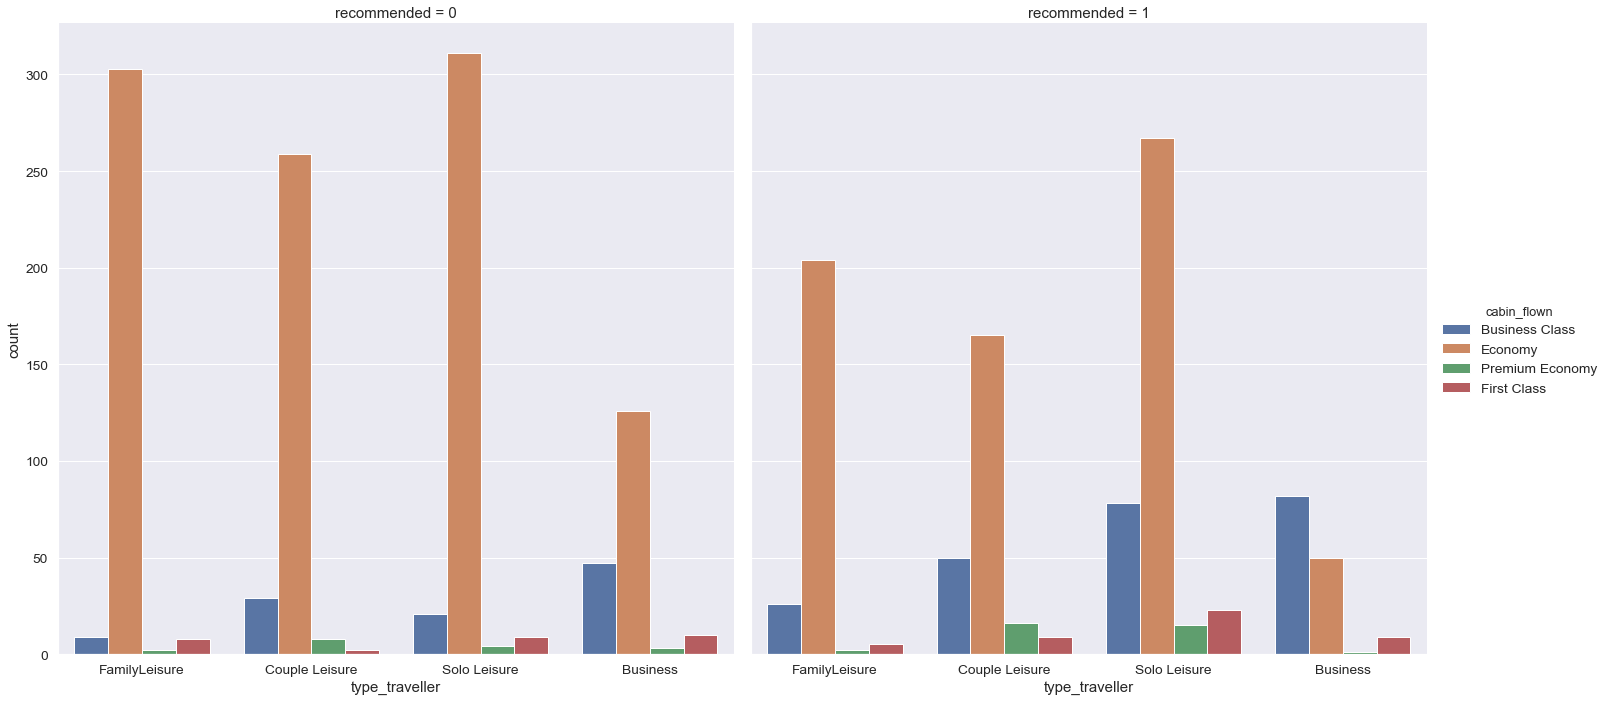

In [276]:
# plot recommended based on the flight class and traveller type
plt.figure()
_  = sns.catplot(x='type_traveller', hue='cabin_flown', col='recommended', kind='count', data=data_112_most_entries, height=9)
plt.show()

Let's plot the top 15 airlines with highest number of reviews:

<Figure size 432x288 with 0 Axes>

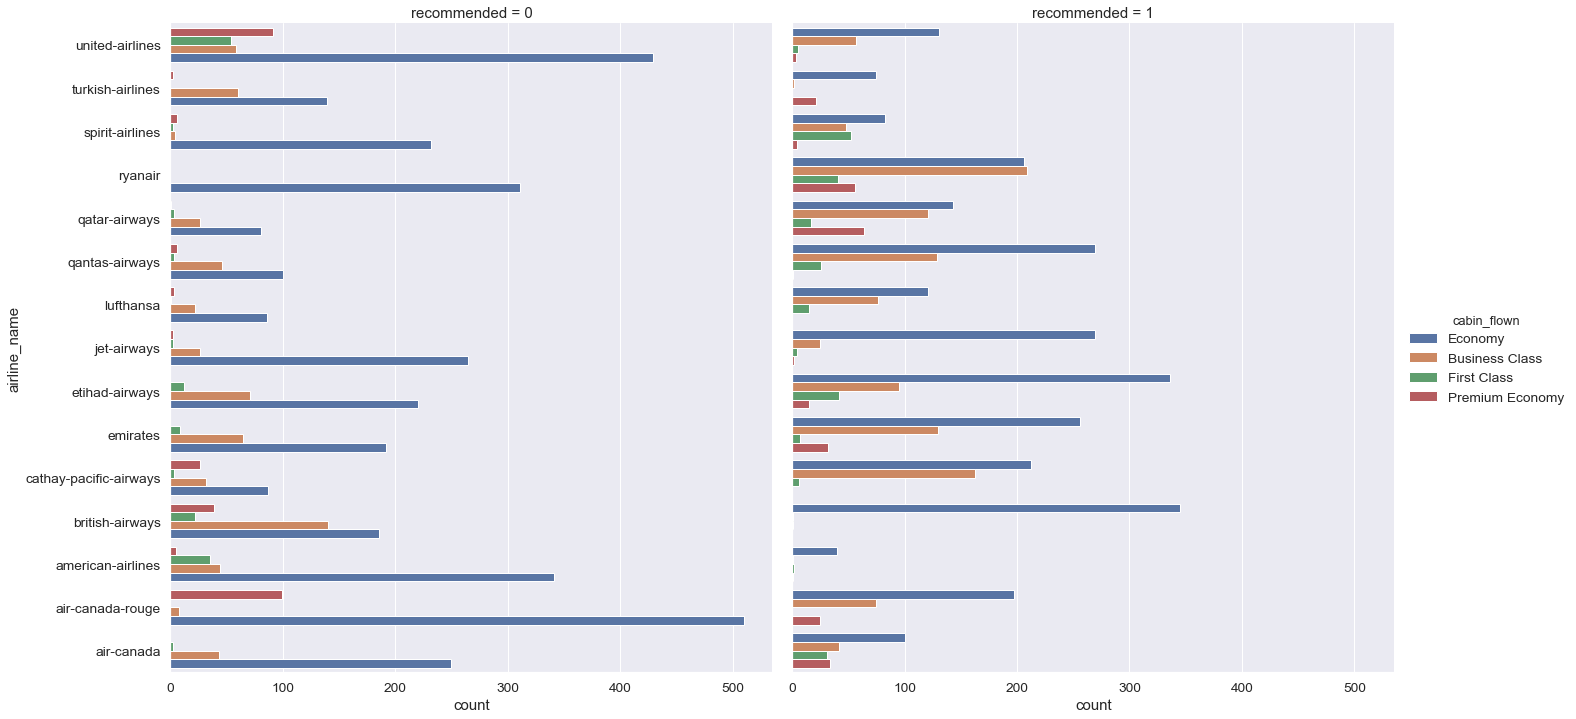

In [289]:
# plot number of recommendations based on the airline and flight class
plt.figure()
ax = sns.catplot(y='airline_name', hue='cabin_flown', col='recommended', data=data_15_most_entries, kind='count', height=10)
plt.show()

<Figure size 4320x7200 with 0 Axes>

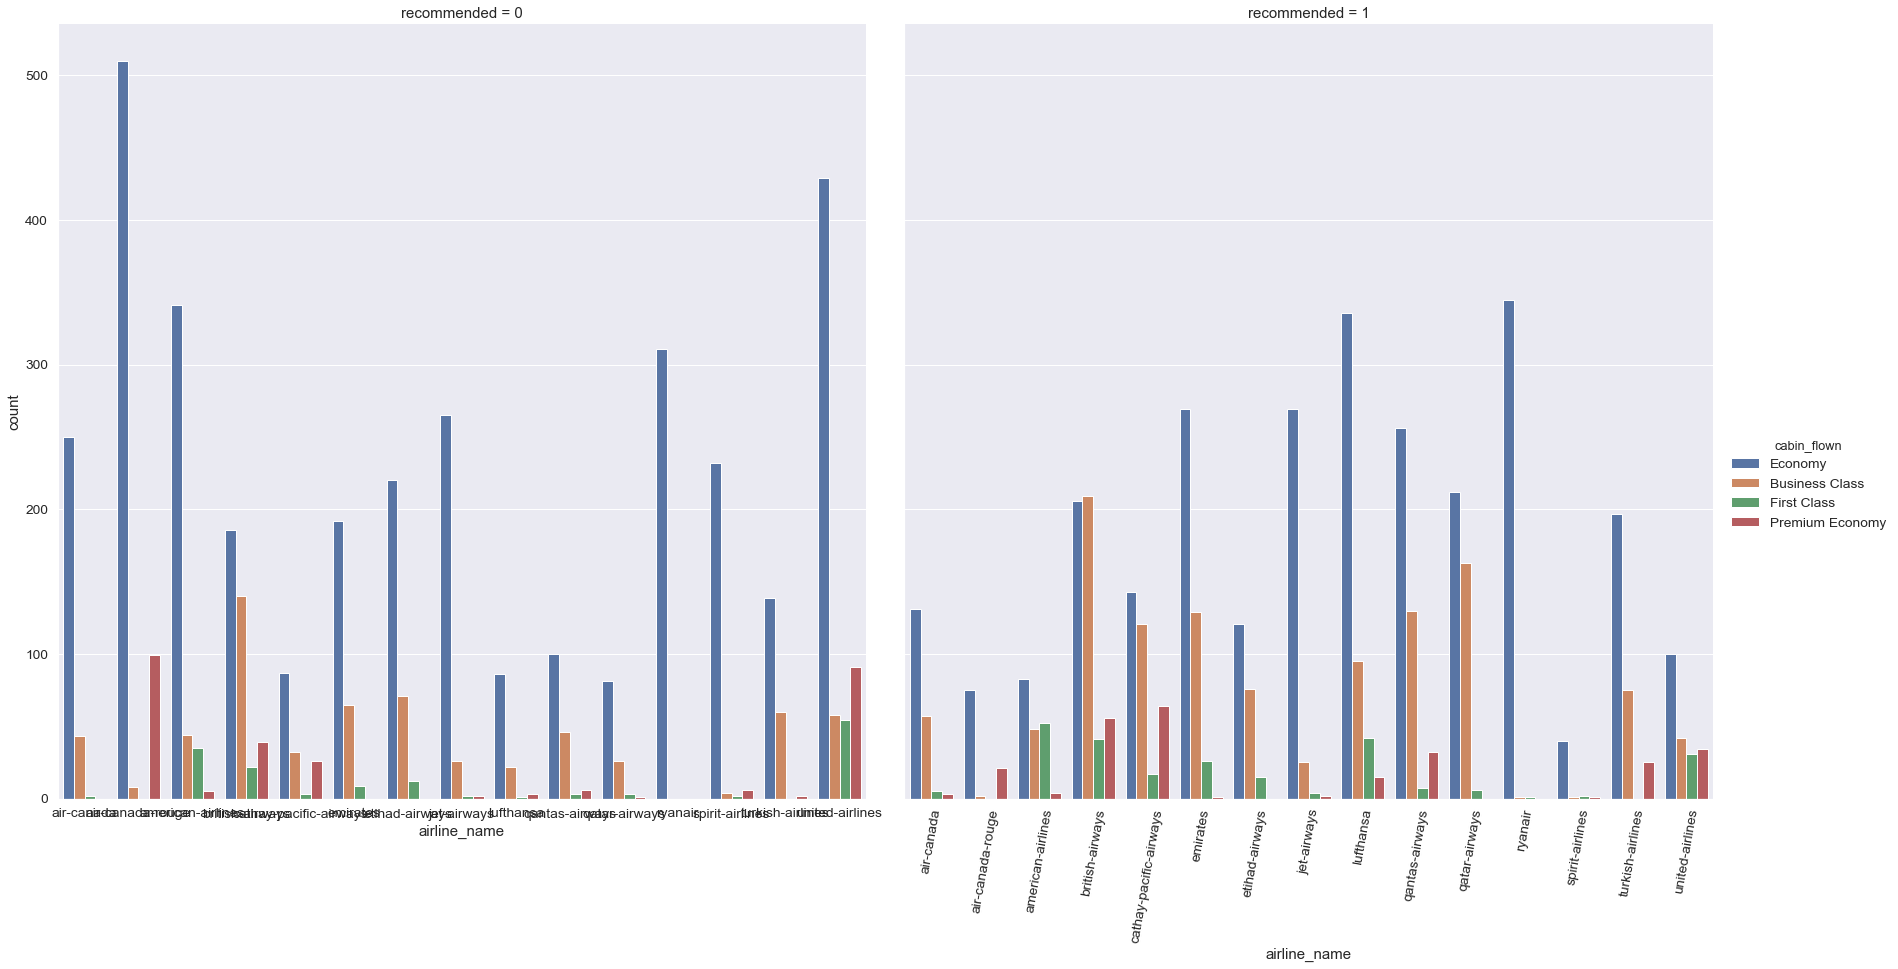

In [257]:
plt.figure(figsize=(60,100))
_  = sns.catplot(x='airline_name', hue='cabin_flown', col='recommended', data=data_15_most_entries, kind='count', height=12)
plt.xticks(rotation=80)
plt.show()

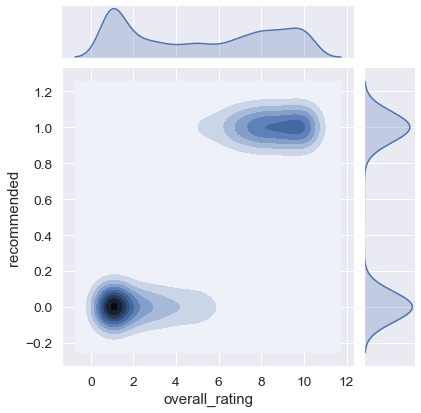

In [262]:
# plot kernel density estimation between overall rating and recommended for top 15 most reviewed airlines
sns.jointplot(x='overall_rating', y='recommended', data=data_15_most_entries, kind="kde");